### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#191970;">Project 6 - Machine Learning - Elections - Part 1

#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#708098;">Project by - Madhu Narayanan  

#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#708098;">Batch - July 2020

#### <span style="font-family: Arial; font-weight:regular;font-size:1.3em;color:#FF00FF">Problem Statement

You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

#### <span style="font-family: Arial; font-weight:regular;font-size:1.3em;color:#2F4F4F">Problems to be solved

<b>1. Data Ingestion:</b>

1.1. Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it.  
1.2. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.   
1.3. Check for Outliers.

<b>2. Data Preparation:</b> 

2.1. Encode the data (having string values) for Modelling.   
2.2. Is Scaling necessary here or not?   
2.3. Data Split: Split the data into train and test (70:30).   

<b>3. Modelling:</b>

3.1. Apply Logistic Regression and LDA (linear discriminant analysis).  
3.2. Apply KNN Model and Naïve Bayes Model. Interpret the results.   
3.3. Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting.   
3.4. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#2F4F4F">Import important libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
import matplotlib.style
plt.style.use('classic')
%matplotlib inline

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale


from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import SMOTE

from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF00FF">1. Data Ingestion:

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#800080">1.1 Data Ingestion: Read the dataset.

#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#800080">Extracting the dataset which is a xlsx file format

In [27]:
df = pd.read_excel('Election_Data.xlsx')

In [28]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


<b>Data Dictionary</b>

1. <b>vote: </b>Party choice: Conservative or Labour
2. <b>age: </b>Age in years
3. <b>economic.cond.national: </b>Assessment of current national economic conditions, 1 to 5.
4. <b>economic.cond.household: </b>Assessment of current household economic conditions, 1 to 5.  
5. <b>Blair: </b>Assessment of the Labour leader, 1 to 5.
6. <b>Hague: </b>Assessment of the Conservative leader, 1 to 5. 
7. <b>Europe: </b> an 11-point scale that measures respondents' attitudes toward European integration. High
    scores represent ‘Eurosceptic’ sentiment.
8. <b>political.knowledge: </b>Knowledge of parties' positions on European integration, 0 to 3.
9. <b>gender: </b>female or male.

The dataset has 10 attributes, where Predictor class 'vote' and one independant variable 'gender' are object dtype and rest are integer types.

There are no missing values. 6 variables are numeric and remaining categorical. Categorical variables are not in encoded format. However need to note that all the integer type variables are categorical type in numeric representation. These are scales or ratings. These can be converted using One-Hot encoding.

The 'Unnamed: 0' variable is a unique identification or a serial number which will not be useful for our analysis. Therfore we shall drop the variable.


In [29]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#800080">Performing the descriptive statistics and doing null value condition check, write an inference on it.

In [30]:
df.isnull().any()

vote                       False
age                        False
economic.cond.national     False
economic.cond.household    False
Blair                      False
Hague                      False
Europe                     False
political.knowledge        False
gender                     False
dtype: bool



There are no missing/null values.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


The average age of voters in the dataset is 54 with youngest voter aged at 24 & oldest aged 93. Also 50% of voters are in the age group of 24-53.

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Check for duplicate data

In [33]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 8
(1525, 9)


There are 8 duplicates records that can be removed.

In [34]:
df.drop_duplicates(inplace=True) 

All duplicate records are removed.

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Geting unique counts of all Objects

In [35]:
df['vote'].value_counts(normalize=True)

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

In [36]:
df['gender'].value_counts(normalize=True)

female    0.53263
male      0.46737
Name: gender, dtype: float64

In [37]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')
        

vote
Labour          1057
Conservative     460
Name: vote, dtype: int64


gender
female    808
male      709
Name: gender, dtype: int64




The date set is balanced with the Dependant variable 'vote' is @ 69.67%:30.32% ratio.

The gender representation is 53%:47% of Female to Male ratio. 
Number of Female voters are highly represented in 812 records to that of 713 records of Male in the given dataset.

#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#800080">1.2. Exploratory data analysis: Performing Univariate and Bivariate Analysis.  

In [38]:
df['age'].value_counts().sort_index()

24    11
25     4
26     7
27    15
28     9
      ..
89     5
90     1
91     1
92     2
93     1
Name: age, Length: 70, dtype: int64

In [39]:
df.groupby(['vote','gender']).count()

age  economic.cond.national  economic.cond.household  \
vote         gender                                                         
Conservative female  257                     257                      257   
             male    203                     203                      203   
Labour       female  551                     551                      551   
             male    506                     506                      506   

                     Blair  Hague  Europe  political.knowledge  
vote         gender                                             
Conservative female    257    257     257                  257  
             male      203    203     203                  203  
Labour       female    551    551     551                  551  
             male      506    506     506                  506

The 'Eurosceptic' sentiment is high in influencing the vote. Out of 1525 records, 957 voters having high 'Eurosceptic' sentiment of rating >=6 which is almost 2/3rd of the voters.

The 'Eurosceptic' sentiment is a highly influencing variable to the predict class 'vote'.

In [40]:
df[['vote','political.knowledge']].groupby('political.knowledge').count()

,vote
political.knowledge,
0,454
1,38
2,776
3,249


There are 455 voters who have voted with zero political knowledge. Higher number of voters having a scale of 2. This only shows the awareness level on political scenario but cannot be concluded as a highly influencing attribute.

In [41]:
df[['vote','economic.cond.national']].groupby('economic.cond.national').count()

,vote
economic.cond.national,
1,37
2,256
3,604
4,538
5,82


In [42]:
df[['vote','economic.cond.household']].groupby('economic.cond.household').count()

,vote
economic.cond.household,
1,65
2,280
3,645
4,435
5,92


In both variables of economic conditions on nation and household, the voters on extreme scales of 1 & 5 are not influencing the decision on votes. Looks like the middle class influence a lot on voting.

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Data Distribution

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Univariate Analysis

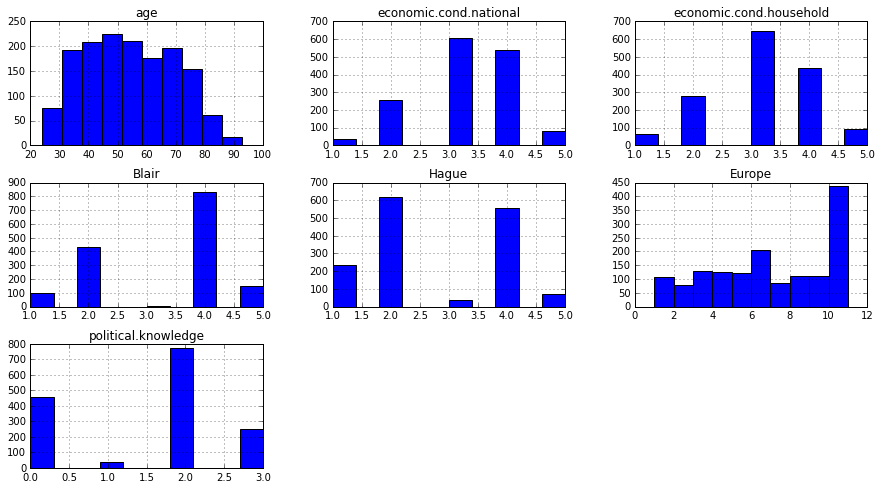

In [43]:
rcParams['figure.figsize'] = 15,8
df.hist();

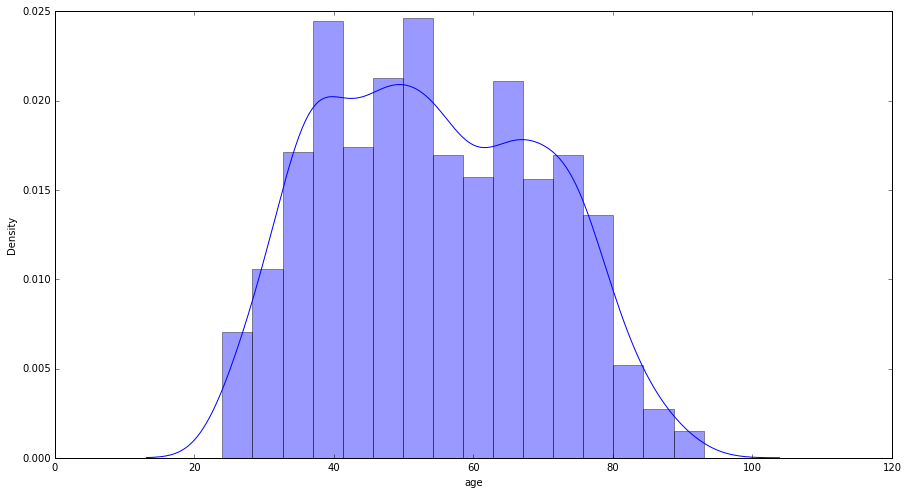

In [44]:
sns.distplot(df['age']);


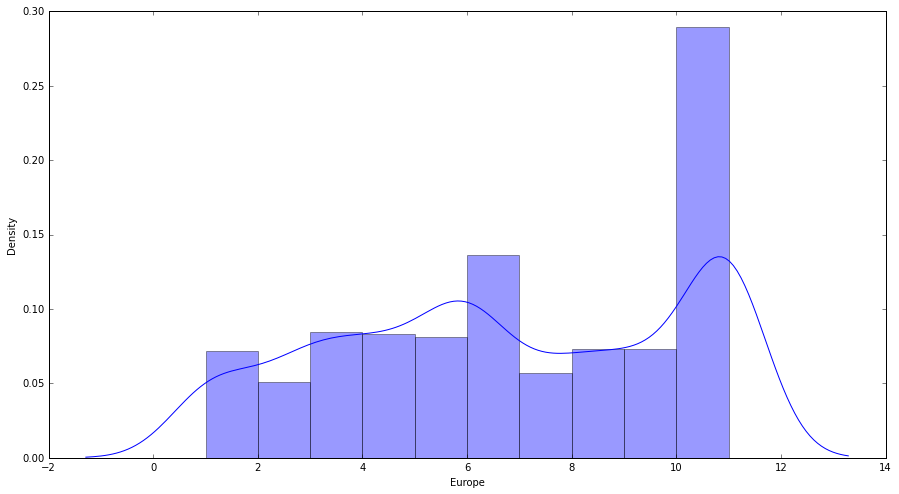

In [45]:
sns.distplot(df['Europe']);

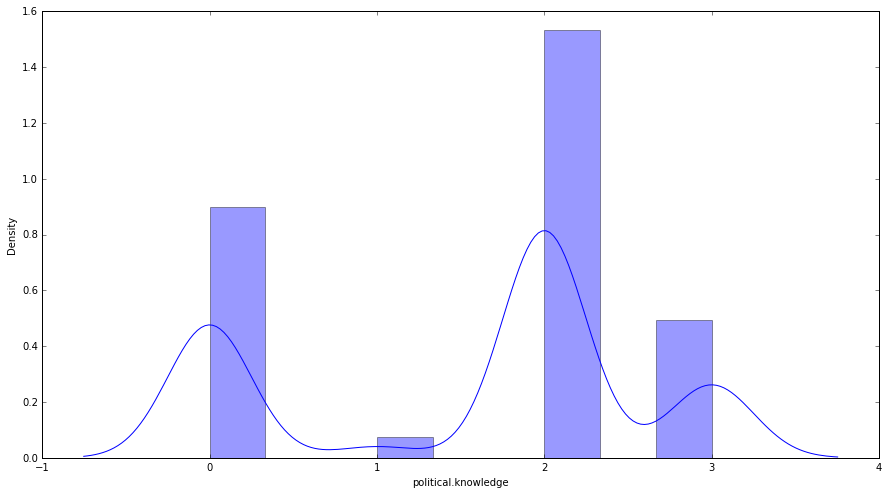

In [46]:
sns.distplot(df['political.knowledge']);

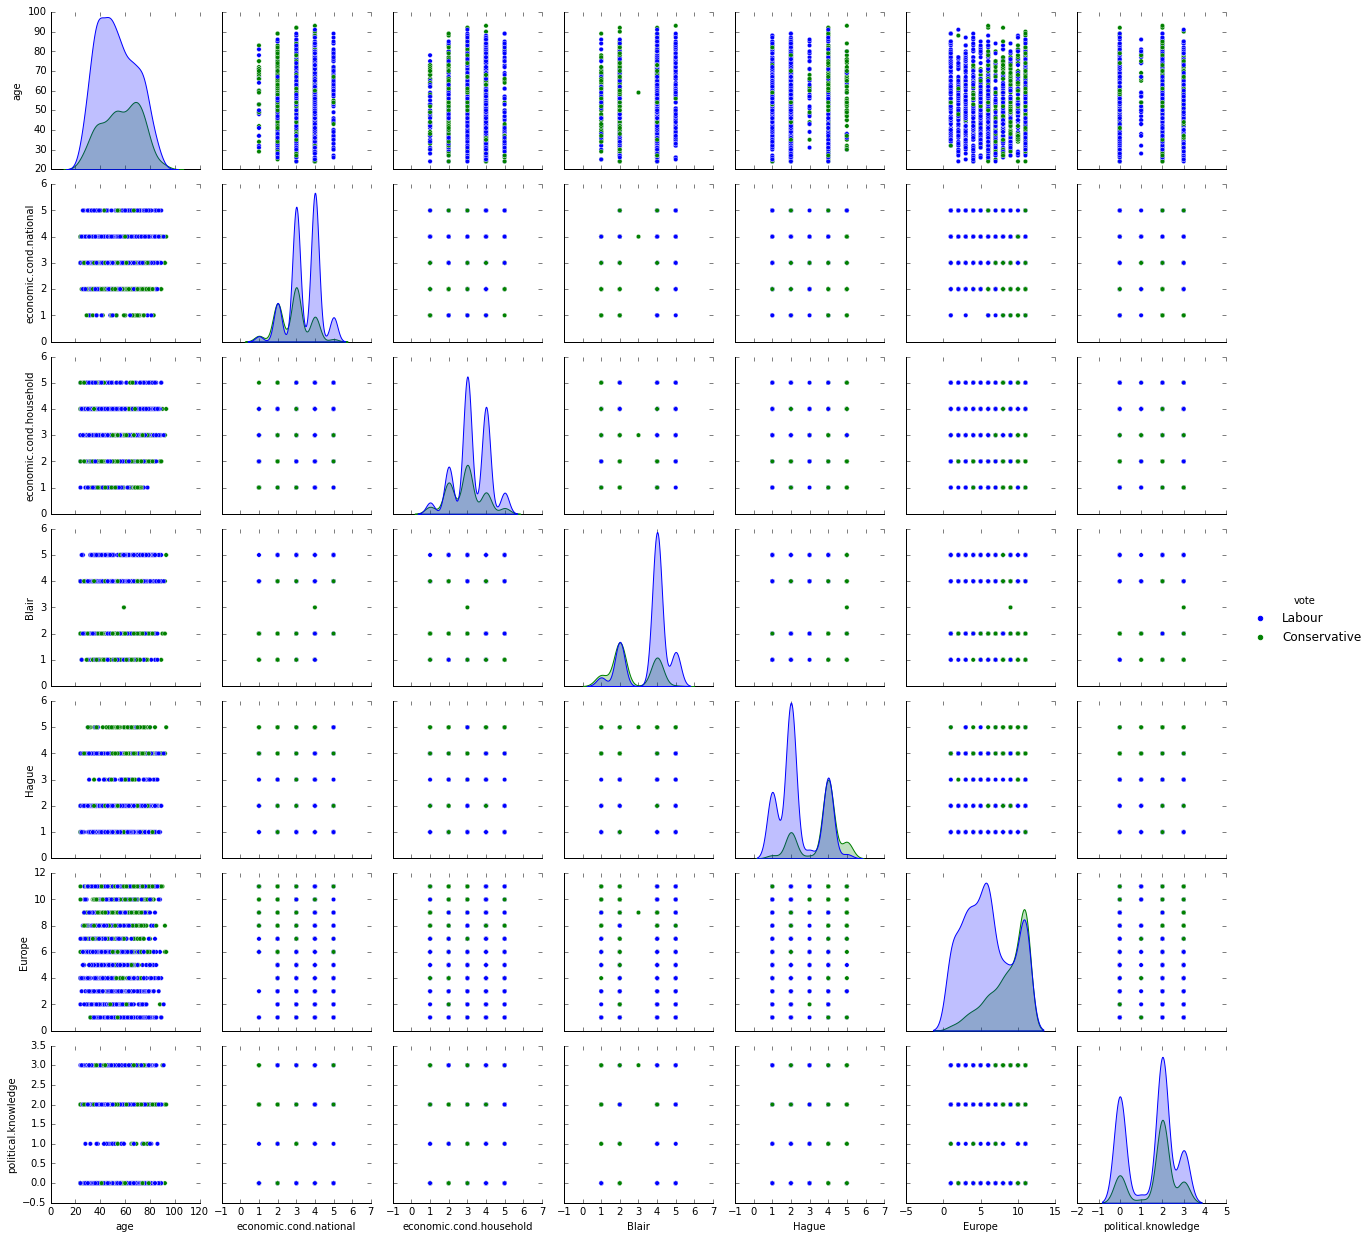

In [47]:
# Pairplot using sns
sns.pairplot(df ,diag_kind='kde',hue='vote');

The diagonals of the pairplot is a good visualiser for understanding how the classes are distributed and separated. If the classes are well separated (blue & orange distribution) then models like  LDA can be a good predictor/classifier and if the classes are not separated, then Logistic regression can play a good role.

Also presence or normally distributed variables can be a good contributor in predicting/classifying the dependant variable. In this case 'Europe' is fairly a good variables to predict and classify. Logically also this hold good.

The correlation between variables is inferred through the heat-map:  

    1. The independent variables are not correlated to each other hence there may not be
       multicollinearity.  
    2. economic.cond.household - economic.cond.national is most positively correlated with 0.35.   
    3. There is hardly any correlation between the independant variables.

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Multivariate Analysis

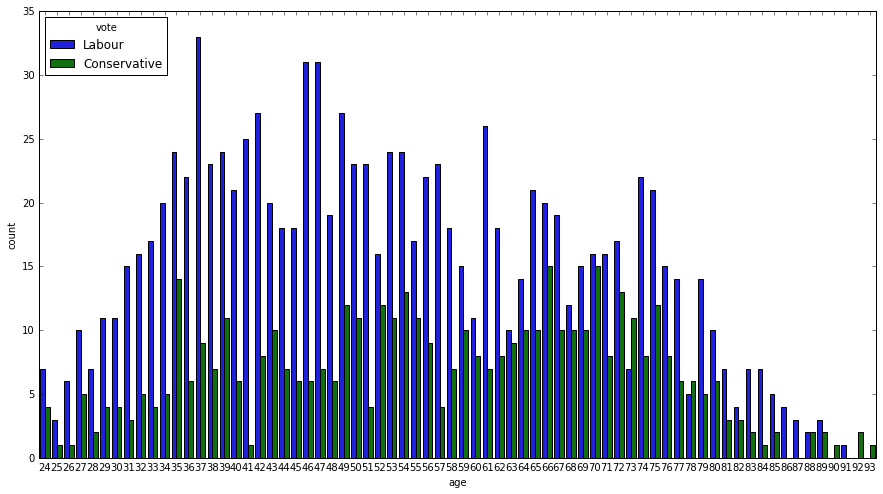

In [48]:
sns.countplot('age',hue='vote',data=df);

Age groups of 36,46,47 & 50 are the highest voting segment for Labour Party.
Age groups of 70,66 & 35 are the highest voting segment for Conservative Party.

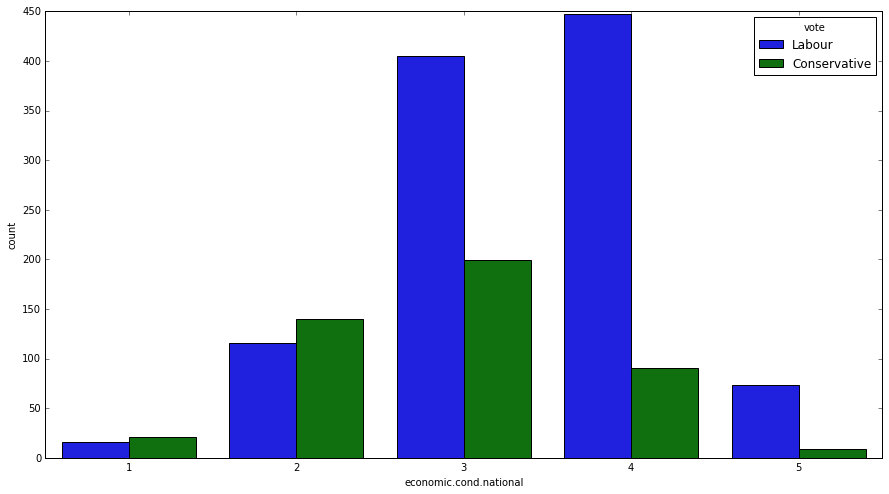

In [49]:
sns.countplot('economic.cond.national',hue='vote',data=df);

Voters rated average to good on 'economic.cond.national', have voted for Labour Party more.
Extreme segments of 1 & 2 have been less in terms of count however voters who have rated lowest have voted for Conservative Party.

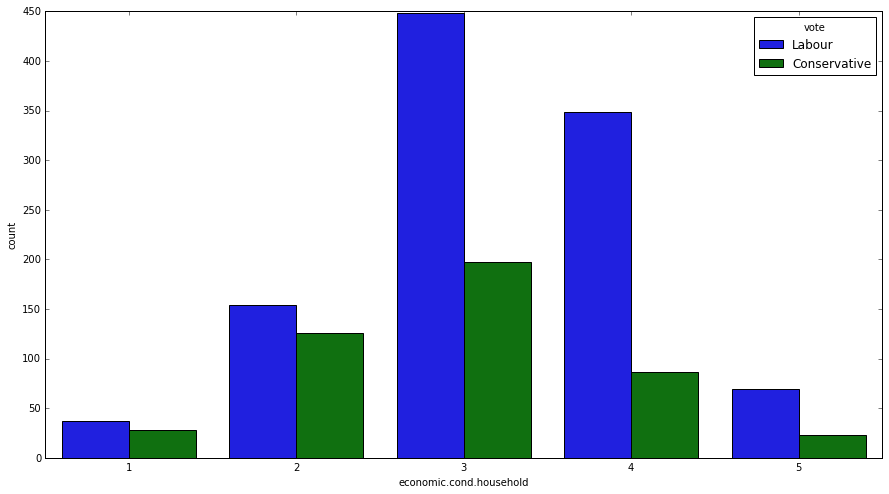

In [50]:
sns.countplot('economic.cond.household',hue='vote',data=df);

Irrespective of the rating, voters  on 'economic.cond.household', have voted for Labour Party more. 

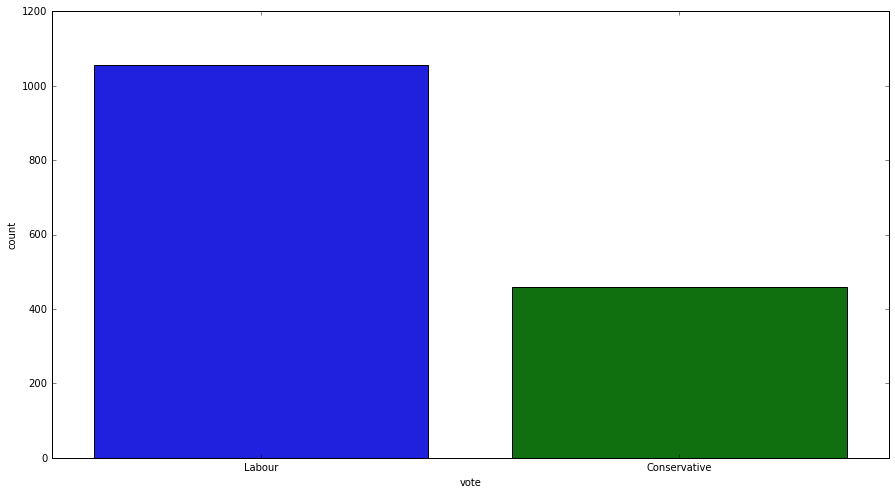

In [51]:
sns.countplot('vote',data=df);

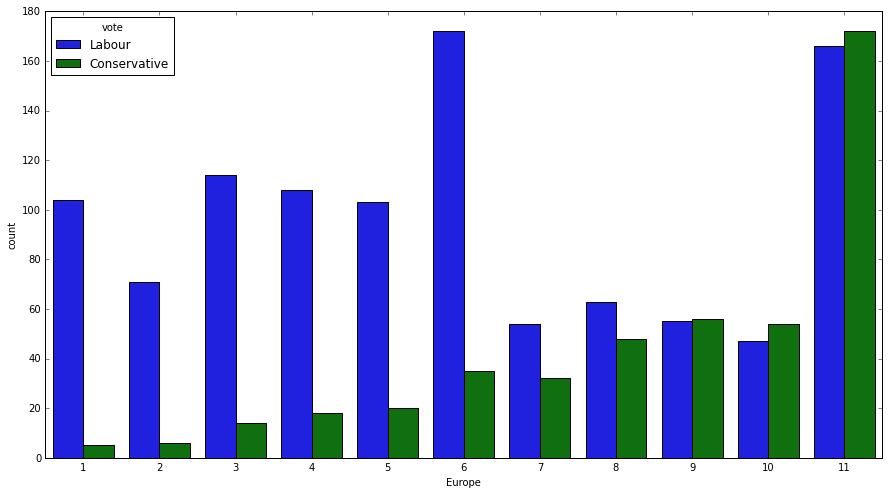

In [52]:
sns.countplot('Europe',hue='vote',data=df);

The 'Eurosceptic' sentiment is high in influencing the vote. Out of 1525 records, 957 voters having high 'Eurosceptic' sentiment of rating >=6 which is almost 2/3rd of the voters.

Conservative Party is favoured among highly 'Eurosceptic' sentiment voters. Among voters who are not having 'Eurosceptic'sentiment, Labour Party is in proportion very highly preferred.

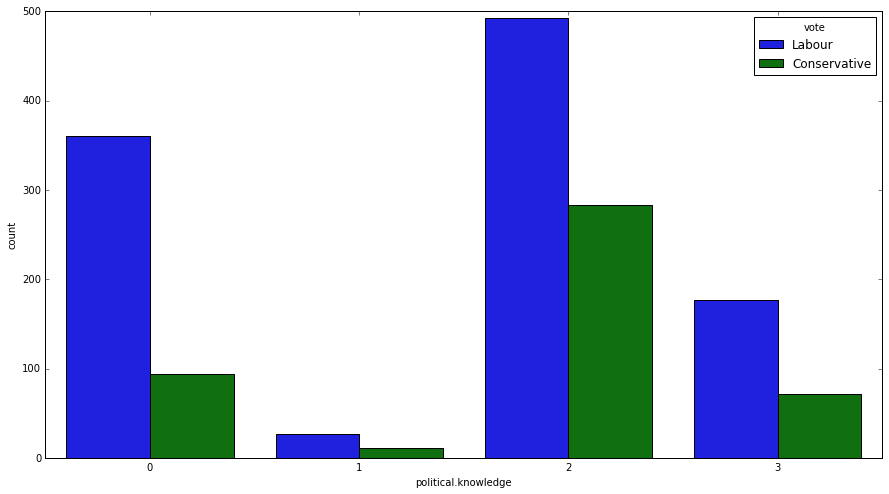

In [53]:
sns.countplot('political.knowledge',hue='vote',data=df);

There are 455 total voters who have voted with zero political knowledge. Higher number of voters having a scale of 2. This only shows the awarness level on political scenario but cannot be concluded as a highly influencing attribute.

Labour party is highly preferred or voted party irrespective of the political knowledge among voters.

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Checking for Correlations.

In [54]:
df.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


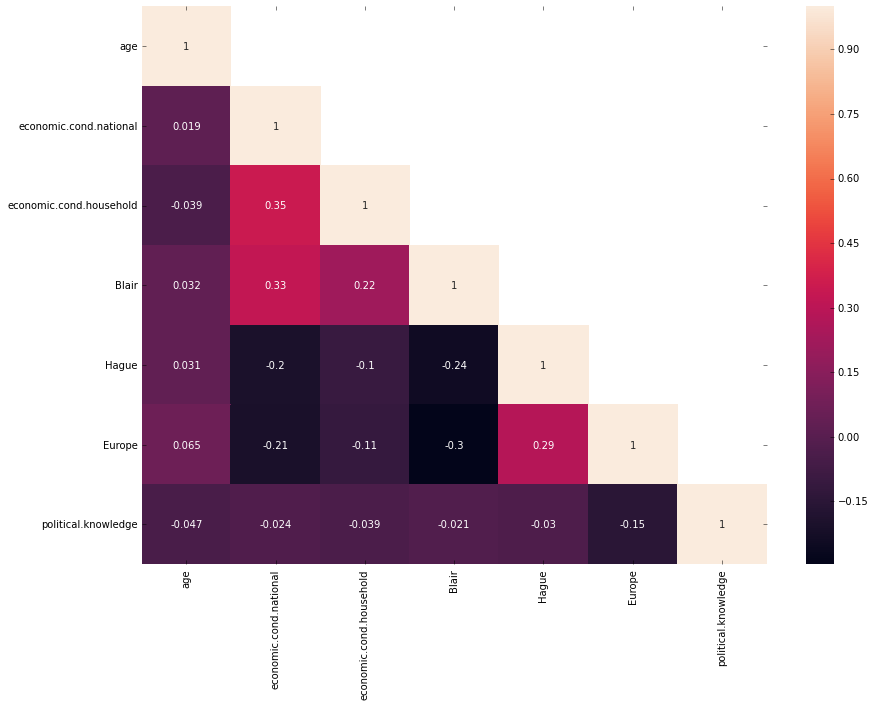

In [55]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1));

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#800080">1.3. Check for Outliers

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Checking the spread of the data using boxplot for the continuous variables, in this case only one variable that is 'age'.

Shape before Outliers Treatment (1517, 9)


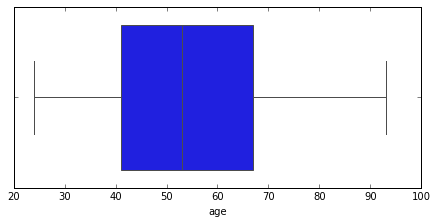

In [56]:
elect_data_plot=df[['age']]
fig=plt.figure(figsize=(12,12))
for i in range(0,len(elect_data_plot.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(elect_data_plot[elect_data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',df.shape)

There were no outlier in 'age' variables of the dataset. We can go ahead as there is no need to treat outliers in this case.

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF00FF">Data Preparation:
#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#800080">1.3. Encode the data (having string values) for Modelling.

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#800080">Converting all objects to categorical codes

In [57]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [58]:
df_cat = df.copy()

In [59]:
elect_data = pd.get_dummies(df_cat, prefix=['ec_national','ec_house','Blair','Hague','Europe','pol_know'], columns=['economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge'])


In [60]:
elect_data.head()

,vote,age,gender,ec_national_1,ec_national_2,ec_national_3,ec_national_4,ec_national_5,ec_house_1,ec_house_2,...,Europe_6,Europe_7,Europe_8,Europe_9,Europe_10,Europe_11,pol_know_0,pol_know_1,pol_know_2,pol_know_3
0,1,43,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,36,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,35,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,24,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,41,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [61]:
elect_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   vote           1517 non-null   int8 
 1   age            1517 non-null   int64
 2   gender         1517 non-null   int8 
 3   ec_national_1  1517 non-null   uint8
 4   ec_national_2  1517 non-null   uint8
 5   ec_national_3  1517 non-null   uint8
 6   ec_national_4  1517 non-null   uint8
 7   ec_national_5  1517 non-null   uint8
 8   ec_house_1     1517 non-null   uint8
 9   ec_house_2     1517 non-null   uint8
 10  ec_house_3     1517 non-null   uint8
 11  ec_house_4     1517 non-null   uint8
 12  ec_house_5     1517 non-null   uint8
 13  Blair_1        1517 non-null   uint8
 14  Blair_2        1517 non-null   uint8
 15  Blair_3        1517 non-null   uint8
 16  Blair_4        1517 non-null   uint8
 17  Blair_5        1517 non-null   uint8
 18  Hague_1        1517 non-null   uint8
 19  Hague_

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#800080">Is Scaling necessary here or not? 

We do not scale the data for this dataset, as one-hot encoding will be applied for all numeric variable types except 'age'. The reason we do that is that the data is scale or rating represented in numbers but are categorical in nature. So we do one-hot encoding. Then only 'age' variable will be left out and therefore no scaling is required.

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#800080">Train Test Split. Data Split: Split the data into train and test (70:30).

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#800080">1.4. Logistic Regression Model & LDA Model

In [62]:
log_df = elect_data.copy()
lda_df = elect_data.copy()
nb_df = elect_data.copy()
knn_df = elect_data.copy()
adb_df = elect_data.copy()
gbm_df = elect_data.copy()
rfc_df = elect_data.copy()
bag_df = elect_data.copy()

In [63]:
# Logistic Regression

LOG_X = log_df.drop('vote', axis=1) 
LOG_y = log_df['vote']

In [64]:
# Split X and y into training and test set in 70:30 ratio for Logistic Regression

LOG_X_train, LOG_X_test, LOG_y_train, LOG_y_test = model_selection.train_test_split(LOG_X, LOG_y, test_size=0.30 , random_state=1, stratify = LOG_y)

In [65]:
# Fit the Logistic Regression model
LOG_model = LogisticRegression(solver='newton-cg',penalty='none',max_iter=10000,verbose=True,n_jobs=2)
LOG_model.fit(LOG_X_train,LOG_y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.0s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [66]:
#Predicting on Training and Test datasets.

LOG_ytrain_predict = LOG_model.predict(LOG_X_train)
LOG_ytest_predict = LOG_model.predict(LOG_X_test)

In [67]:
# Training Data Probability Prediction for Logistice Regression

LOG_pred_prob_train = LOG_model.predict_proba(LOG_X_train)

# Test Data Probability Prediction
LOG_pred_prob_test = LOG_model.predict_proba(LOG_X_test)

In [68]:
LOG_pred_prob_train[:,1]

array([0.85808766, 0.9831785 , 0.50942229, ..., 0.99732152, 0.15964428,
       0.37619774])

In [69]:
LOG_ytest_predict_prob=LOG_model.predict_proba(LOG_X_test)
pd.DataFrame(LOG_ytest_predict_prob).head()

,0,1
0,0.220340,0.779660
1,0.658251,0.341749
2,0.087090,0.912910
3,0.047734,0.952266
4,0.160355,0.839645


In [70]:
# LDA

LDA_X = lda_df.drop('vote',axis=1)
LDA_y = lda_df.pop('vote')

In [71]:
# Split X and y into training and test set in 70:30 ratio for LDA

LDA_X_train,LDA_X_test,LDA_y_train,LDA_y_test = model_selection.train_test_split(LDA_X,LDA_y, test_size=0.30,random_state=1, stratify = LDA_y)

In [72]:
LDA_clf = LinearDiscriminantAnalysis()
LDA_model=LDA_clf.fit(LDA_X_train,LDA_y_train)

In [73]:
#Predicting on Training and Test datasets.

LDA_pred_class_train = LDA_model.predict(LDA_X_train)
LDA_pred_class_test = LDA_model.predict(LDA_X_test)

In [74]:
# Training Data Probability Prediction for LDA

LDA_pred_prob_train = LDA_model.predict_proba(LDA_X_train)

# Test Data Probability Prediction
LDA_pred_prob_test = LDA_model.predict_proba(LDA_X_test)

In [75]:
LDA_pred_prob_train[:,1]

array([0.91988053, 0.97266519, 0.46817229, ..., 0.99032247, 0.16021386,
       0.36562495])

In [76]:
LDA_ytest_predict_prob=LDA_model.predict_proba(LDA_X_test)
pd.DataFrame(LDA_ytest_predict_prob).head()

,0,1
0,0.162201,0.837799
1,0.755975,0.244025
2,0.171554,0.828446
3,0.019770,0.980230
4,0.088377,0.911623


#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#800080">1.5. Naive Bayes & KNN Model

In [77]:


NB_X = nb_df.drop("vote",axis=1)  ## Features
NB_y = nb_df["vote"]  ## Target

In [78]:
# Split X and y into training and test set in 70:30 ratio for Naive Bayes

NB_X_train, NB_X_test, NB_y_train, NB_y_test = model_selection.train_test_split(NB_X, NB_y, test_size=0.30 , random_state=1, stratify = NB_y)

In [79]:
NB_model = GaussianNB()
NB_model.fit(NB_X_train, NB_y_train)

GaussianNB()

In [80]:
#Predicting on Training and Test datasets.

NB_pred_class_train = NB_model.predict(NB_X_train)
NB_pred_class_test = NB_model.predict(NB_X_test)

In [81]:
# Training Data Probability Prediction for Naive Bayes

NB_pred_prob_train = NB_model.predict_proba(NB_X_train)

# Test Data Probability Prediction
NB_pred_prob_test = NB_model.predict_proba(NB_X_test)

In [82]:
NB_pred_prob_train[:,1]

array([9.85035630e-01, 1.00000000e+00, 3.27378619e-01, ...,
       1.00000000e+00, 4.02410723e-14, 3.56289909e-01])

In [83]:
NB_ytest_predict_prob=NB_model.predict_proba(NB_X_test)
pd.DataFrame(NB_ytest_predict_prob).head()

,0,1
0,2.017982e-01,0.798202
1,7.831591e-01,0.216841
2,2.547941e-16,1.000000
3,2.575104e-03,0.997425
4,2.137686e-02,0.978623


In [84]:
KNN_X = knn_df.drop("vote",axis=1)  ## Features
KNN_y = knn_df["vote"]  ## Target

In [85]:
# Split X and y into training and test set in 70:30 ratio for kNN

KNN_X_train, KNN_X_test, KNN_y_train, KNN_y_test = model_selection.train_test_split(KNN_X, KNN_y, test_size=0.30 , random_state=1, stratify = KNN_y)

**Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error**

Hint: Misclassification error **(MCE) = 1 - Test accuracy score.** Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [86]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(KNN_X_train, KNN_y_train)
    # evaluate test accuracy
    scores = knn.score(KNN_X_test, KNN_y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2478070175438597,
 0.3048245614035088,
 0.23245614035087714,
 0.24561403508771928,
 0.23026315789473684,
 0.22587719298245612,
 0.2214912280701754,
 0.23684210526315785,
 0.23903508771929827,
 0.22807017543859653,
 0.22807017543859653,
 0.22368421052631582,
 0.22587719298245612,
 0.23464912280701755,
 0.23903508771929827,
 0.24122807017543857,
 0.22807017543859653,
 0.23464912280701755,
 0.24561403508771928]

**Plot misclassification error vs k (with k value on X-axis) using matplotli**

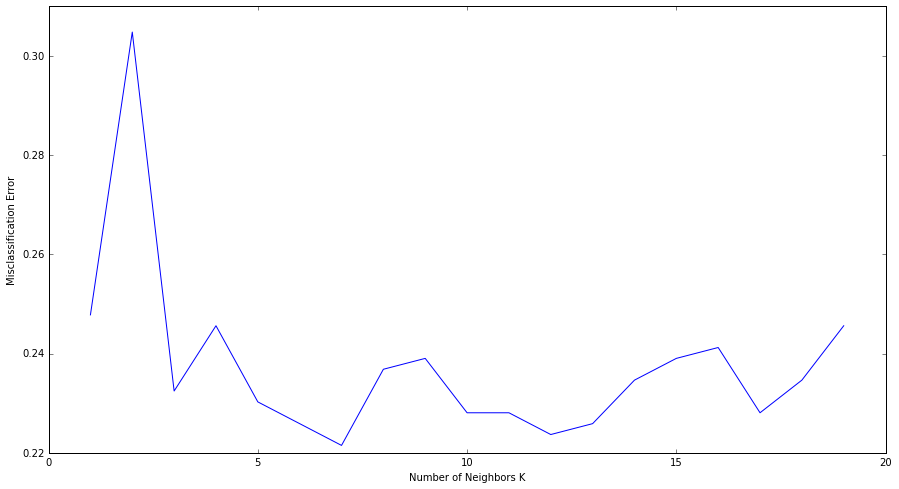

In [87]:
# plot misclassification error vs k
plt.plot(range(1,20,1), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

For K = 3 it is giving the best test accuracy lets check train and test for K= 3 with other evaluation metrics

In [203]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(KNN_X_train,KNN_y_train)

KNeighborsClassifier(n_neighbors=7)

In [204]:
#Predicting on Training and Test datasets.

KNN_pred_class_train = KNN_model.predict(KNN_X_train)
KNN_pred_class_test = KNN_model.predict(KNN_X_test)

In [205]:
# Training Data Probability Prediction for KNN

KNN_pred_prob_train = KNN_model.predict_proba(KNN_X_train)

# Test Data Probability Prediction

KNN_pred_prob_test = KNN_model.predict_proba(KNN_X_test)

In [206]:
KNN_pred_prob_train[:,1]

array([0.71428571, 1.        , 0.57142857, ..., 0.71428571, 0.42857143,
       0.42857143])

In [207]:
KNN_ytest_predict_prob=KNN_model.predict_proba(KNN_X_test)
pd.DataFrame(KNN_ytest_predict_prob).head()

,0,1
0,0.428571,0.571429
1,0.571429,0.428571
2,0.142857,0.857143
3,0.000000,1.000000
4,0.000000,1.000000


#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#800080">1.6 Bagging & Boosting:
    
    Bagging Classifier (using Random Forest)
    Ada Boosting 
    Gradient Boosting Model

In [93]:
RFC_X = rfc_df.drop("vote",axis=1)  ## Features
RFC_y = rfc_df["vote"]  ## Target

In [94]:
# Split X and y into training and test set in 70:30 ratio for Bagging Classifier

RFC_X_train, RFC_X_test, RFC_y_train, RFC_y_test = model_selection.train_test_split(RFC_X, RFC_y, test_size=0.30 , random_state=1,stratify = RFC_y)

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Applying GridSearchCV for Random Forest

In [95]:
rfc_param_grid={'n_estimators':[100,150,175],
      'max_depth':[5,10,15],
      'max_samples':[100,150,200],
      'max_features':[7,12,15]}
rfc = RandomForestClassifier(random_state=1)

rfc_grid_search = GridSearchCV(estimator = rfc, param_grid = rfc_param_grid)

In [96]:
rfc_grid_search.fit(RFC_X_train, RFC_y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 10, 15], 'max_features': [7, 12, 15],
                         'max_samples': [100, 150, 200],
                         'n_estimators': [100, 150, 175]})

In [97]:
rfc_grid_search.best_params_

{'max_depth': 15, 'max_features': 15, 'max_samples': 150, 'n_estimators': 175}

In [98]:
RFC_best_model = rfc_grid_search.best_estimator_

In [99]:
RFC_best_model

RandomForestClassifier(max_depth=15, max_features=15, max_samples=150,
                       n_estimators=175, random_state=1)

In [100]:
BAG_X = bag_df.drop("vote",axis=1)  ## Features
BAG_y = bag_df["vote"]  ## Target

In [101]:
# Split X and y into training and test set in 70:30 ratio for Bagging Classifier

BAG_X_train, BAG_X_test, BAG_y_train, BAG_y_test = model_selection.train_test_split(BAG_X, BAG_y, test_size=0.30 , random_state=1, stratify = BAG_y)

In [102]:
## Using Random Forest perform Bagging Classifier


BAG_model = BaggingClassifier(base_estimator=RFC_best_model,random_state=1)
BAG_model.fit(BAG_X_train,BAG_y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=15,
                                                        max_features=15,
                                                        max_samples=150,
                                                        n_estimators=175,
                                                        random_state=1),
                  random_state=1)

In [103]:
# Prediction on the training set

BAG_ytrain_predict = BAG_model.predict(BAG_X_train)
BAG_ytest_predict = BAG_model.predict(BAG_X_test)

In [104]:
## Getting the probabilities on the test set

BAG_ytest_predict_prob = BAG_model.predict_proba(BAG_X_test)
pd.DataFrame(BAG_ytest_predict_prob).head()

,0,1
0,0.295429,0.704571
1,0.681143,0.318857
2,0.254286,0.745714
3,0.127429,0.872571
4,0.166857,0.833143


In [105]:
#Predicting on Training and Test datasets.

BAG_pred_class_train = BAG_model.predict(BAG_X_train)
BAG_pred_class_test = BAG_model.predict(BAG_X_test)

In [106]:
# Training Data Probability Prediction for Bagging (using Random Forest)

BAG_pred_prob_train = BAG_model.predict_proba(BAG_X_train)

# Test Data Probability Prediction

BAG_pred_prob_test = BAG_model.predict_proba(BAG_X_test)

In [107]:
BAG_pred_prob_train[:,1]

array([0.87714286, 0.92914286, 0.44685714, ..., 0.91314286, 0.46971429,
       0.41371429])

In [108]:
BAG_ytest_predict_prob=BAG_model.predict_proba(BAG_X_test)
pd.DataFrame(BAG_ytest_predict_prob).head()

,0,1
0,0.295429,0.704571
1,0.681143,0.318857
2,0.254286,0.745714
3,0.127429,0.872571
4,0.166857,0.833143


In [109]:
ADB_X = adb_df.drop("vote",axis=1)  ## Features
ADB_y = adb_df["vote"]  ## Target

In [110]:
# Split X and y into training and test set in 70:30 ratio for Ada Boost

ADB_X_train, ADB_X_test, ADB_y_train, ADB_y_test = model_selection.train_test_split(ADB_X, ADB_y, test_size=0.30 , random_state=1, stratify = ADB_y)

In [111]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(ADB_X_train,ADB_y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [112]:
#Predicting on Training and Test datasets.

ADB_pred_class_train = ADB_model.predict(ADB_X_train)
ADB_pred_class_test = ADB_model.predict(ADB_X_test)

In [113]:
# Training Data Probability Prediction for ADB

ADB_pred_prob_train = ADB_model.predict_proba(ADB_X_train)

# Test Data Probability Prediction

ADB_pred_prob_test = ADB_model.predict_proba(ADB_X_test)

In [114]:
ADB_pred_prob_train[:,1]

array([0.50518739, 0.51244992, 0.49470073, ..., 0.51906313, 0.496769  ,
       0.49911714])

In [115]:
ADB_ytest_predict_prob=ADB_model.predict_proba(ADB_X_test)
pd.DataFrame(ADB_ytest_predict_prob).head()

,0,1
0,0.496217,0.503783
1,0.501295,0.498705
2,0.493534,0.506466
3,0.492244,0.507756
4,0.494295,0.505705


In [116]:
GBM_X = gbm_df.drop("vote",axis=1)  ## Features
GBM_y = gbm_df["vote"]  ## Target

In [117]:
# Split X and y into training and test set in 70:30 ratio for Gradient Boost

GBM_X_train, GBM_X_test, GBM_y_train, GBM_y_test = model_selection.train_test_split(GBM_X, GBM_y, test_size=0.30 , random_state=1, stratify = GBM_y)

In [118]:
GBM_model = GradientBoostingClassifier(random_state=1)
GBM_model.fit(GBM_X_train,GBM_y_train)

GradientBoostingClassifier(random_state=1)

In [119]:
#Predicting on Training and Test datasets.

GBM_pred_class_train = GBM_model.predict(GBM_X_train)
GBM_pred_class_test = GBM_model.predict(GBM_X_test)

In [120]:
# Training Data Probability Prediction for GBM

GBM_pred_prob_train = GBM_model.predict_proba(GBM_X_train)

# Test Data Probability Prediction

GBM_pred_prob_test = GBM_model.predict_proba(GBM_X_test)

In [121]:
GBM_pred_prob_train[:,1]

array([0.86566656, 0.98188218, 0.18390104, ..., 0.99333849, 0.11274516,
       0.35049658])

In [122]:
GBM_ytest_predict_prob=GBM_model.predict_proba(GBM_X_test)
pd.DataFrame(GBM_ytest_predict_prob).head()

,0,1
0,0.322903,0.677097
1,0.741129,0.258871
2,0.136510,0.863490
3,0.077951,0.922049
4,0.126893,0.873107


#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.1em;color:#800080">1.7. Performance Metrics: 
    
    Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix.
    Plot ROC curve and get ROC_AUC score for each model 
    Final Model: Compare Both the models and write inference which model is best/optimized.

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#800080">Model Evaluation

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#800080">for Logistic Regression

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">AUC and ROC for the training data

AUC: 0.893


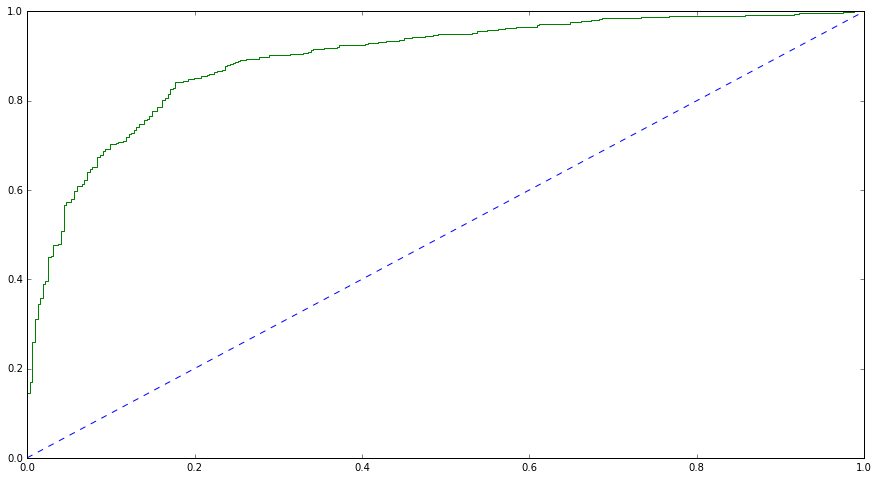

In [123]:
# predict probabilities
probs = LOG_model.predict_proba(LOG_X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logr_train_auc = roc_auc_score(LOG_y_train, probs)
print('AUC: %.3f' % logr_train_auc)
# calculate roc curve
logr_train_fpr, logr_train_tpr, logr_train_thresholds = roc_curve(LOG_y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logr_train_fpr, logr_train_tpr);

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">AUC and ROC for the test data

AUC: 0.914


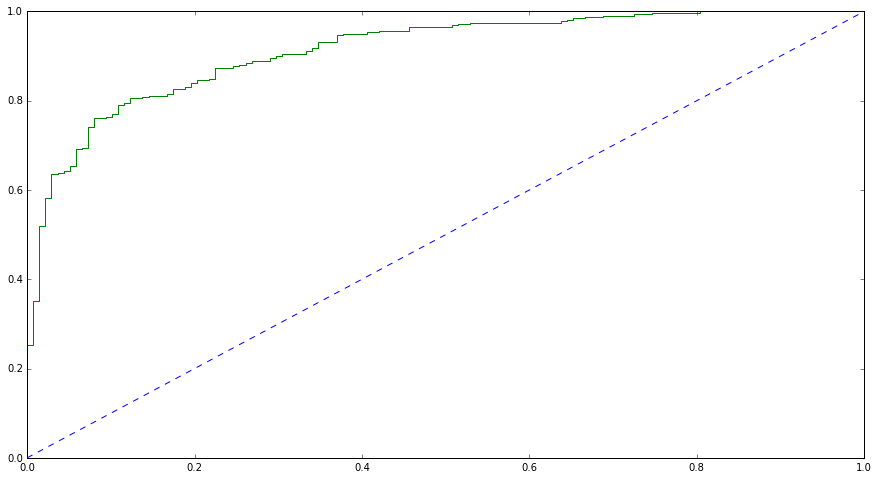

In [124]:
# predict probabilities
probs = LOG_model.predict_proba(LOG_X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logr_test_auc = roc_auc_score(LOG_y_test, probs)
print('AUC: %.3f' % logr_test_auc)
# calculate roc curve
logr_test_fpr, logr_test_tpr, logr_test_thresholds = roc_curve(LOG_y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logr_test_fpr, logr_test_tpr);

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Confusion Matrix for the training data

In [125]:
confusion_matrix(LOG_y_train, LOG_ytrain_predict)

array([[231,  91],
       [ 76, 663]])

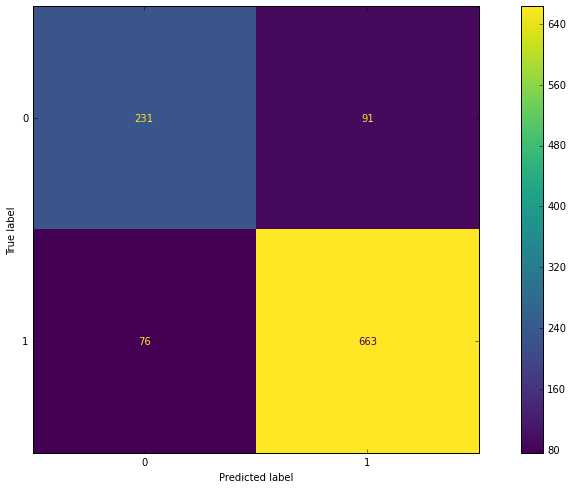

In [126]:
plot_confusion_matrix(LOG_model,LOG_X_train,LOG_y_train);

In [127]:
print(classification_report(LOG_y_train, LOG_ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       322
           1       0.88      0.90      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061



#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Confusion Matrix for test data

In [128]:
confusion_matrix(LOG_y_test, LOG_ytest_predict)

array([[ 91,  47],
       [ 28, 290]])

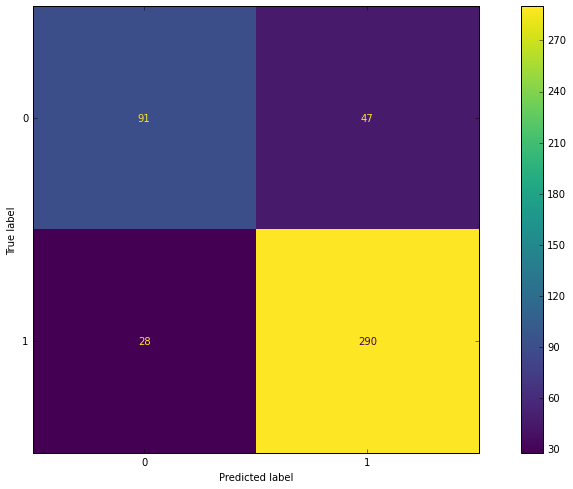

In [129]:
plot_confusion_matrix(LOG_model,LOG_X_test,LOG_y_test);

In [130]:
print(classification_report(LOG_y_test, LOG_ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       138
           1       0.86      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456



#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Applying GridSearchCV for Logistic Regression

In [131]:
grid={'penalty':['l1','none'],
      'solver':['sag','lbfgs','saga','liblinear','newton-cg'],
      'tol':[0.001,0.0001,0.00001]}

In [132]:
LOG_model = LogisticRegression(max_iter=100000)

In [133]:
log_grid_search = GridSearchCV(estimator = LOG_model, param_grid = grid, cv = 5,n_jobs=2,scoring='f1')

In [134]:
log_grid_search.fit(LOG_X_train, LOG_y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000), n_jobs=2,
             param_grid={'penalty': ['l1', 'none'],
                         'solver': ['sag', 'lbfgs', 'saga', 'liblinear',
                                    'newton-cg'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='f1')

In [135]:
print(log_grid_search.best_params_,'\n')
print(log_grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'saga', 'tol': 0.001} 

LogisticRegression(max_iter=100000, penalty='l1', solver='saga', tol=0.001)


In [136]:
LOG_best_model = log_grid_search.best_estimator_

In [137]:
# Prediction on the training set

LOG_ytrain_predict = LOG_best_model.predict(LOG_X_train)
LOG_ytest_predict = LOG_best_model.predict(LOG_X_test)

In [138]:
## Getting the probabilities on the test set

LOG_ytest_predict_prob = LOG_best_model.predict_proba(LOG_X_test)
pd.DataFrame(LOG_ytest_predict_prob).head()

,0,1
0,0.203099,0.796901
1,0.737279,0.262721
2,0.166479,0.833521
3,0.045505,0.954495
4,0.117199,0.882801


              precision    recall  f1-score   support

           0       0.75      0.65      0.69       322
           1       0.85      0.91      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061
 



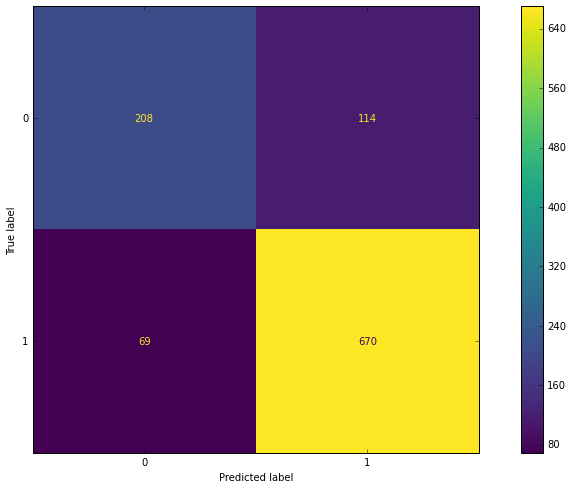

In [139]:
## Confusion matrix on the training data

plot_confusion_matrix(LOG_best_model,LOG_X_train,LOG_y_train)
print(classification_report(LOG_y_train, LOG_ytrain_predict),'\n');

In [140]:
logr_train_metrics = classification_report(LOG_y_train,LOG_ytrain_predict,output_dict=True)
logr_train_df = pd.DataFrame(logr_train_metrics).transpose()
logr_train_precision=round(logr_train_df.loc["1"][0],2)
logr_train_recall=round(logr_train_df.loc["1"][1],2)
logr_train_f1=round(logr_train_df.loc["1"][2],2)
print ('logr_train_precision ',logr_train_precision)
print ('logr_train_recall ',logr_train_recall)
print ('logr_train_f1 ',logr_train_f1)

logr_train_precision  0.85
logr_train_recall  0.91
logr_train_f1  0.88


In [141]:
logr_train_acc=LOG_best_model.score(LOG_X_train,LOG_y_train)
logr_train_acc

0.827521206409048

              precision    recall  f1-score   support

           0       0.79      0.66      0.72       138
           1       0.86      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.83      0.79      0.81       456
weighted avg       0.84      0.84      0.84       456
 



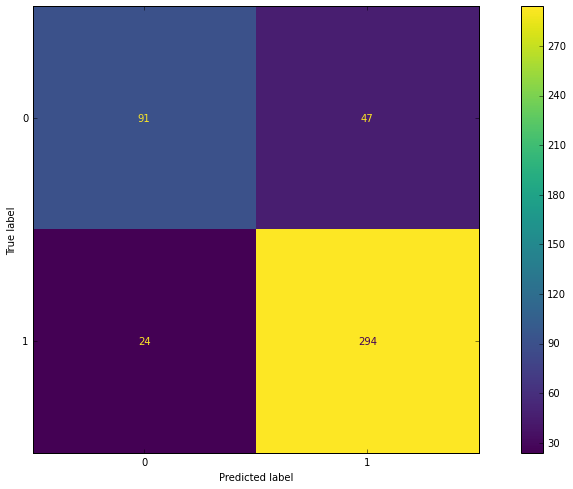

In [142]:
## Confusion matrix on the test data

plot_confusion_matrix(LOG_best_model,LOG_X_test,LOG_y_test)
print(classification_report(LOG_y_test, LOG_ytest_predict),'\n');

In [143]:
logr_test_metrics=classification_report(LOG_y_test,LOG_ytest_predict,output_dict=True)
logr_test_df=pd.DataFrame(logr_test_metrics).transpose()
logr_test_precision=round(logr_test_df.loc["1"][0],2)
logr_test_recall=round(logr_test_df.loc["1"][1],2)
logr_test_f1=round(logr_test_df.loc["1"][2],2)
print ('logr_test_precision ',logr_test_precision)
print ('logr_test_recall ',logr_test_recall)
print ('logr_test_f1 ',logr_test_f1)

logr_test_precision  0.86
logr_test_recall  0.92
logr_test_f1  0.89


In [144]:
logr_test_acc = LOG_best_model.score(LOG_X_test, LOG_y_test)
logr_test_acc

0.8442982456140351

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#800080">for LDA

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Training Data and Test Data Confusion Matrix Comparison

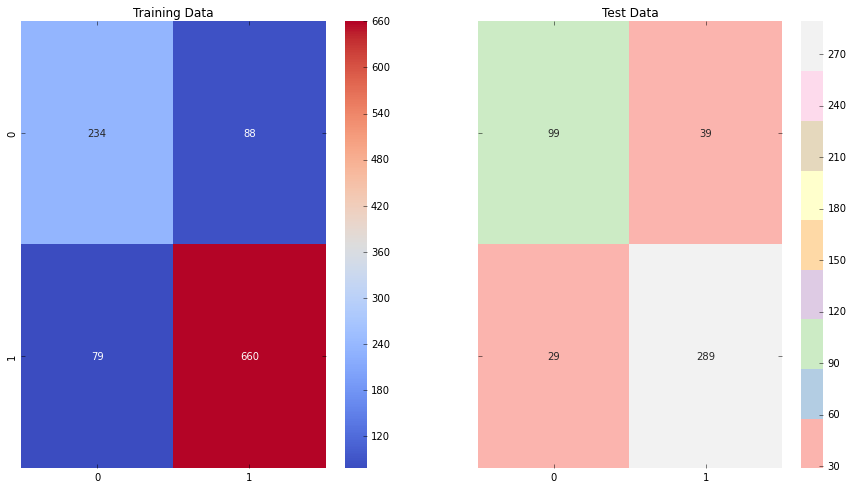

In [145]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(LDA_y_train,LDA_pred_class_train)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(LDA_y_test,LDA_pred_class_test)),annot=True,fmt='.5g',cmap='Pastel1',ax=a[0][1]);
a[0][1].set_title('Test Data');

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Training Data and Test Data Classification Report Comparison

In [146]:
print('Classification Report of the training data:\n\n',metrics.classification_report(LDA_y_train,LDA_pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(LDA_y_test,LDA_pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      0.73      0.74       322
           1       0.88      0.89      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.72      0.74       138
           1       0.88      0.91      0.89       318

    accuracy                           0.85       456
   macro avg       0.83      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456
 



#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Probability prediction for the training and test data

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">AUC and ROC for the training data

AUC for the Training Data: 0.887
AUC for the Test Data: 0.919


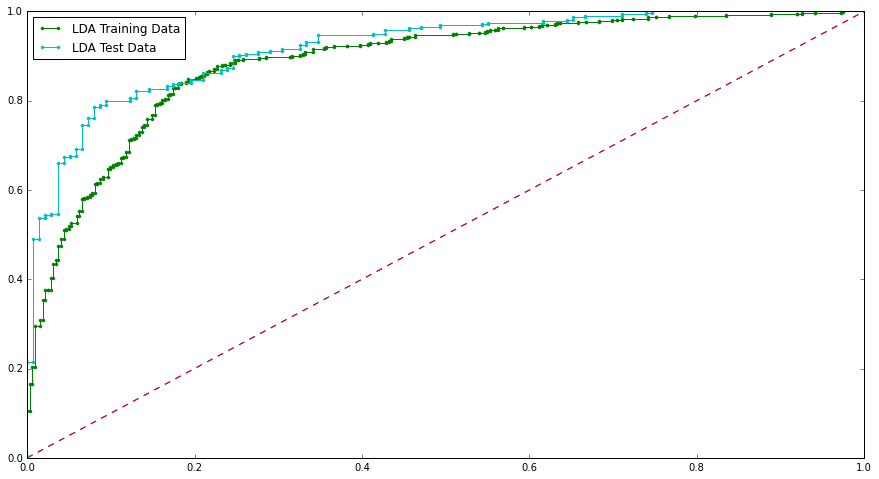

In [147]:
# AUC and ROC for the training data

# calculate AUC
LDA_train_auc = metrics.roc_auc_score(LDA_y_train,LDA_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % LDA_train_auc)

#  calculate roc curve
LDA_train_fpr, LDA_train_tpr, LDA_train_thresholds = metrics.roc_curve(LDA_y_train,LDA_pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr, marker='.',label = 'LDA Training Data')


# AUC and ROC for the test data

# calculate AUC
LDA_test_auc = metrics.roc_auc_score(LDA_y_test,LDA_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % LDA_test_auc)

#  calculate roc curve
LDA_test_fpr, LDA_test_tpr, LDA_test_thresholds = metrics.roc_curve(LDA_y_test,LDA_pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr, marker='.',label='LDA Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [148]:
LDA_clf = LinearDiscriminantAnalysis()
LDA_model=LDA_clf.fit(LDA_X_train,LDA_y_train)

In [149]:
LDA_train_metrics=classification_report(LDA_y_train,LDA_pred_class_train,output_dict=True)
LDA_train_df=pd.DataFrame(LDA_train_metrics).transpose()
LDA_train_precision=round(LDA_train_df.loc["1"][0],2)
LDA_train_recall=round(LDA_train_df.loc["1"][1],2)
LDA_train_f1=round(LDA_train_df.loc["1"][2],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_precision  0.88
LDA_train_recall  0.89
LDA_train_f1  0.89


In [150]:
LDA_train_acc = LDA_model.score(LDA_X_train,LDA_y_train)
LDA_train_acc

0.8426013195098964

In [151]:
LDA_test_metrics=classification_report(LDA_y_test,LDA_pred_class_test,output_dict=True)
LDA_test_df=pd.DataFrame(LDA_test_metrics).transpose()
LDA_test_precision=round(LDA_test_df.loc["1"][0],2)
LDA_test_recall=round(LDA_test_df.loc["1"][1],2)
LDA_test_f1=round(LDA_test_df.loc["1"][2],2)
print ('LDA_default_test_precision ',LDA_test_precision)
print ('LDA_default_test_recall ',LDA_test_recall)
print ('LDAr_default_test_f1 ',LDA_test_f1)

LDA_default_test_precision  0.88
LDA_default_test_recall  0.91
LDAr_default_test_f1  0.89


In [152]:
LDA_test_acc = LDA_model.score(LDA_X_test,LDA_y_test)
LDA_test_acc

0.8508771929824561

0.8020735155513666
              precision    recall  f1-score   support

           0       0.67      0.68      0.68       322
           1       0.86      0.85      0.86       739

    accuracy                           0.80      1061
   macro avg       0.77      0.77      0.77      1061
weighted avg       0.80      0.80      0.80      1061
 



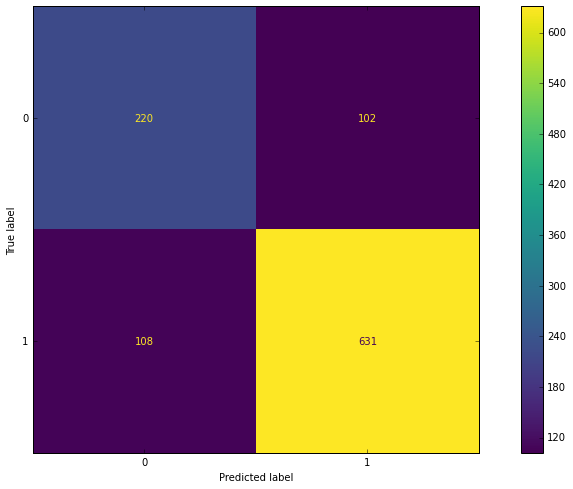

In [153]:
## Confusion matrix of NB on the training data

NB_y_train_predict = NB_model.predict(NB_X_train)
NB_model_score = NB_model.score(NB_X_train, NB_y_train)  ## Accuracy
print(NB_model_score)
plot_confusion_matrix(NB_model,NB_X_train,NB_y_train)
print(classification_report(NB_y_train, NB_y_train_predict),'\n');

0.8157894736842105
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       138
           1       0.87      0.87      0.87       318

    accuracy                           0.82       456
   macro avg       0.78      0.78      0.78       456
weighted avg       0.82      0.82      0.82       456
 



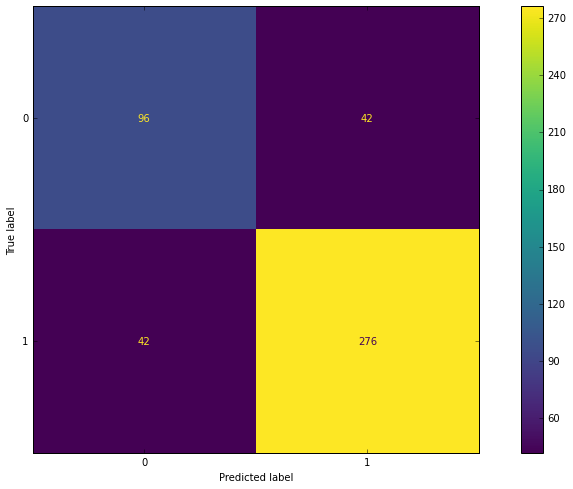

In [154]:
## Confusion matrix of NB on the testing data

NB_y_test_predict = NB_model.predict(NB_X_test)
NB_model_score = NB_model.score(NB_X_test, NB_y_test)                 ## Accuracy
print(NB_model_score)
plot_confusion_matrix(NB_model,NB_X_test,NB_y_test)
print(classification_report(NB_y_test, NB_y_test_predict),'\n');

In [155]:
nb_train_metrics = classification_report(NB_y_train,NB_y_train_predict,output_dict=True)
nb_train_df = pd.DataFrame(nb_train_metrics).transpose()
nb_train_precision=round(nb_train_df.loc["1"][0],2)
nb_train_recall=round(nb_train_df.loc["1"][1],2)
nb_train_f1=round(nb_train_df.loc["1"][2],2)
print ('nb_train_precision ',nb_train_precision)
print ('nb_train_recall ',nb_train_recall)
print ('nb_train_f1 ',nb_train_f1)

nb_train_precision  0.86
nb_train_recall  0.85
nb_train_f1  0.86


In [156]:
nb_test_metrics = classification_report(NB_y_test,NB_y_test_predict,output_dict=True)
nb_test_df = pd.DataFrame(nb_test_metrics).transpose()
nb_test_precision=round(nb_test_df.loc["1"][0],2)
nb_test_recall=round(nb_test_df.loc["1"][1],2)
nb_test_f1=round(nb_test_df.loc["1"][2],2)
print ('nb_test_precision ',nb_test_precision)
print ('nb_test_recall ',nb_test_recall)
print ('nb_test_f1 ',nb_test_f1)

nb_test_precision  0.87
nb_test_recall  0.87
nb_test_f1  0.87


In [157]:
nb_train_acc = NB_model.score(NB_X_train, NB_y_train)
print('GuassianNB Model accuracy for Train data is:\n', nb_train_acc)
nb_test_acc = NB_model.score(NB_X_test, NB_y_test)
print('GuassianNB Model accuracy for Test data is:\n',nb_test_acc)

GuassianNB Model accuracy for Train data is:
 0.8020735155513666
GuassianNB Model accuracy for Test data is:
 0.8157894736842105


AUC: 0.848


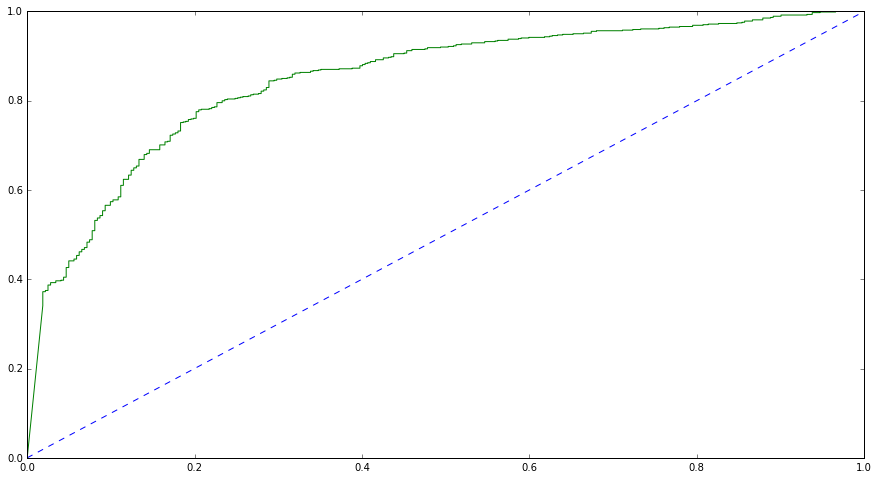

In [158]:
# predict probabilities
probs = NB_model.predict_proba(NB_X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_train_auc = roc_auc_score(NB_y_train, probs)
print('AUC: %.3f' % nb_train_auc)
# calculate roc curve
nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(NB_y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr);

AUC: 0.854


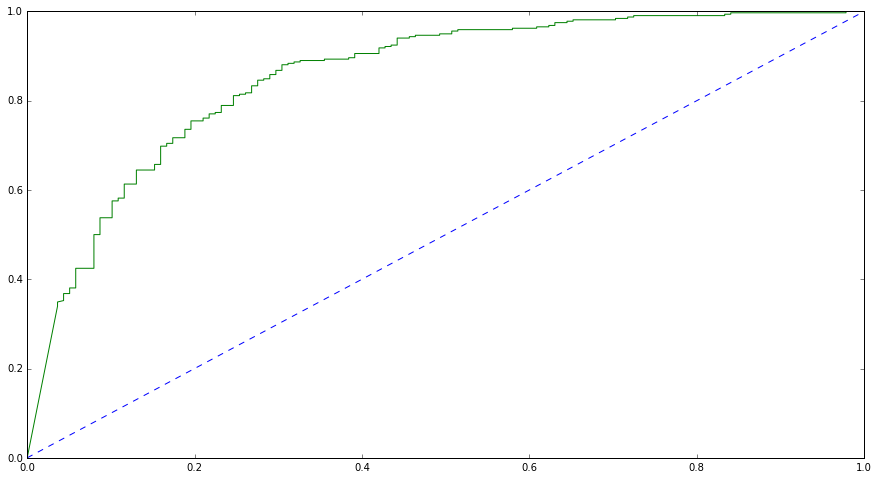

In [159]:
# predict probabilities
probs = NB_model.predict_proba(NB_X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_test_auc = roc_auc_score(NB_y_test, probs)
print('AUC: %.3f' % nb_test_auc)
# calculate roc curve
nb_test_fpr, nb_test_tpr, nb_test_thresholds = roc_curve(NB_y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_test_fpr, nb_test_tpr);

0.8058435438265787
              precision    recall  f1-score   support

           0       0.76      0.53      0.62       322
           1       0.82      0.93      0.87       739

    accuracy                           0.81      1061
   macro avg       0.79      0.73      0.75      1061
weighted avg       0.80      0.81      0.79      1061
 



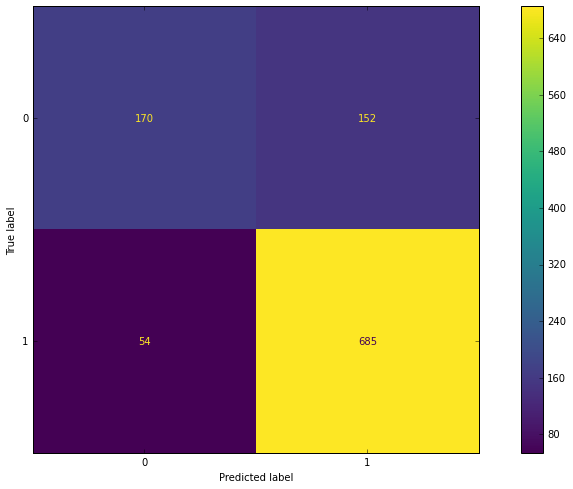

In [208]:
## Confusion matrix of KNN on the training data

KNN_y_train_predict = KNN_model.predict(KNN_X_train)
KNN_model_score = KNN_model.score(KNN_X_train, KNN_y_train)
print(KNN_model_score)
plot_confusion_matrix(KNN_model,KNN_X_train,KNN_y_train)
print(classification_report(KNN_y_train, KNN_y_train_predict),'\n');

0.7785087719298246
              precision    recall  f1-score   support

           0       0.71      0.46      0.56       138
           1       0.80      0.92      0.85       318

    accuracy                           0.78       456
   macro avg       0.75      0.69      0.70       456
weighted avg       0.77      0.78      0.76       456
 



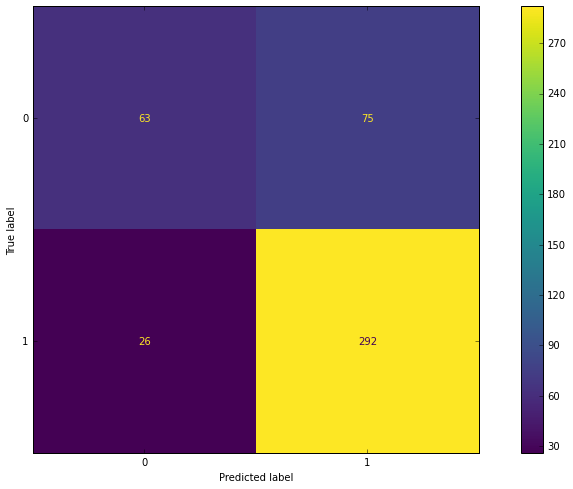

In [209]:
## Confusion matrix of KNN on the testing data

KNN_y_test_predict = KNN_model.predict(KNN_X_test)
KNN_model_score = KNN_model.score(KNN_X_test, KNN_y_test)
print(KNN_model_score)
plot_confusion_matrix(KNN_model,KNN_X_test,KNN_y_test)
print(classification_report(KNN_y_test, KNN_y_test_predict),'\n');

In [210]:
knn_train_metrics = classification_report(KNN_y_train,KNN_y_train_predict,output_dict=True)
knn_train_df = pd.DataFrame(knn_train_metrics).transpose()
knn_train_precision=round(knn_train_df.loc["1"][0],2)
knn_train_recall=round(knn_train_df.loc["1"][1],2)
knn_train_f1=round(knn_train_df.loc["1"][2],2)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)

knn_train_precision  0.82
knn_train_recall  0.93
knn_train_f1  0.87


In [211]:
knn_test_metrics = classification_report(KNN_y_train,KNN_y_train_predict,output_dict=True)
knn_test_df = pd.DataFrame(knn_test_metrics).transpose()
knn_test_precision=round(knn_test_df.loc["1"][0],2)
knn_test_recall=round(knn_test_df.loc["1"][1],2)
knn_test_f1=round(knn_test_df.loc["1"][2],2)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

knn_test_precision  0.82
knn_test_recall  0.93
knn_test_f1  0.87


In [212]:
knn_train_acc = KNN_model.score(KNN_X_train, KNN_y_train)
print('KNeighbors Classifier Model accuracy for Train data is:\n',knn_train_acc)

knn_test_acc = KNN_model.score(KNN_X_test, KNN_y_test)
print('KNeighbors Classifier Model accuracy for Test data is:\n',knn_test_acc)

KNeighbors Classifier Model accuracy for Train data is:
 0.8058435438265787
KNeighbors Classifier Model accuracy for Test data is:
 0.7785087719298246


AUC: 0.874


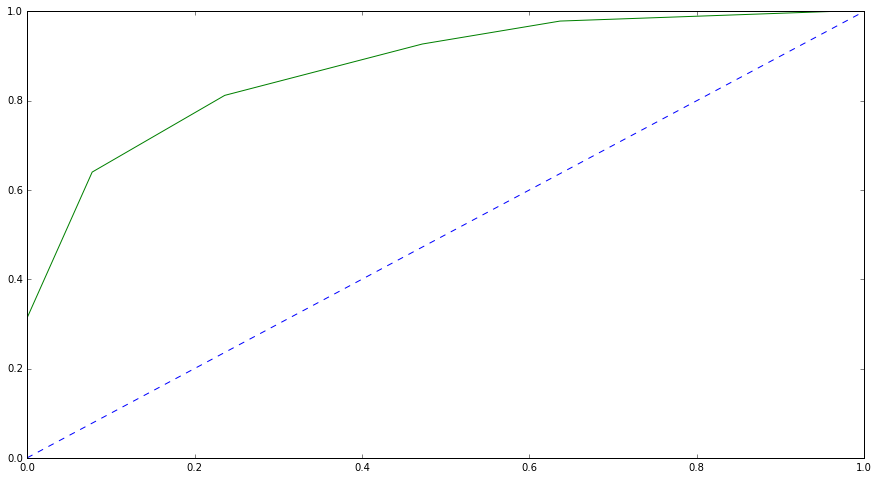

In [213]:
# predict probabilities
probs = KNN_model.predict_proba(KNN_X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(KNN_y_train, probs)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(KNN_y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr);

AUC: 0.798


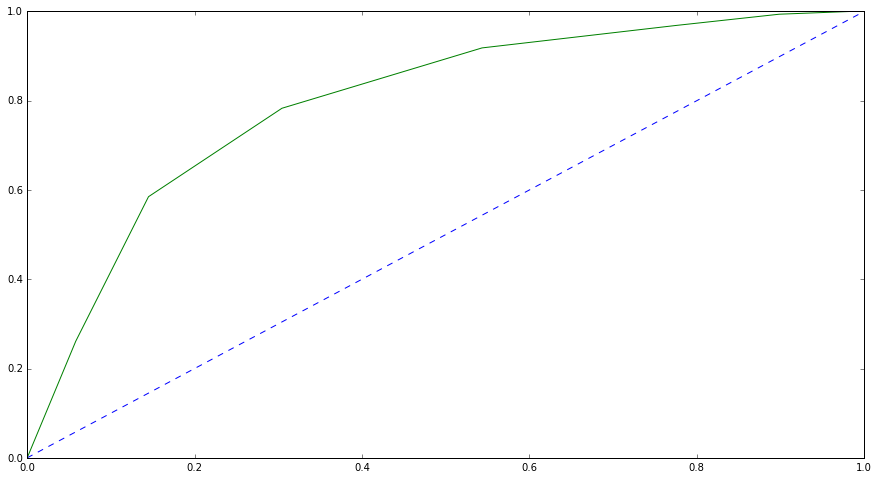

In [214]:
# predict probabilities
probs = KNN_model.predict_proba(KNN_X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(KNN_y_test, probs)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(KNN_y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr);

0.8407163053722903
              precision    recall  f1-score   support

           0       0.76      0.69      0.73       322
           1       0.87      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061
 



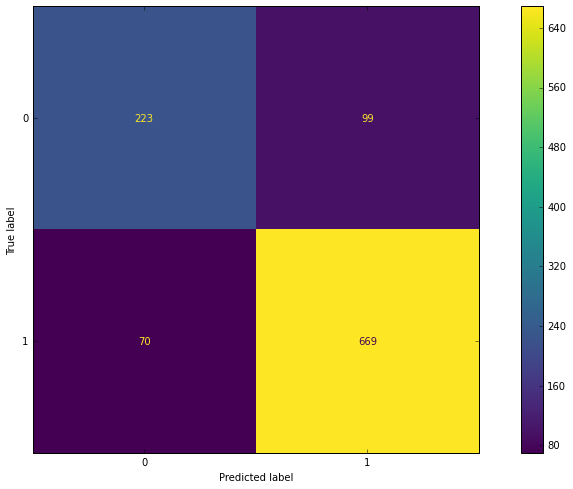

In [167]:
## Confusion matrix of ADB on the training data

ADB_y_train_predict = ADB_model.predict(ADB_X_train)
ADB_model_score = ADB_model.score(ADB_X_train, ADB_y_train)
print(ADB_model_score)
plot_confusion_matrix(ADB_model,ADB_X_train,ADB_y_train)
print(classification_report(ADB_y_train, ADB_y_train_predict),'\n');

0.8333333333333334
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       138
           1       0.87      0.90      0.88       318

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456
 



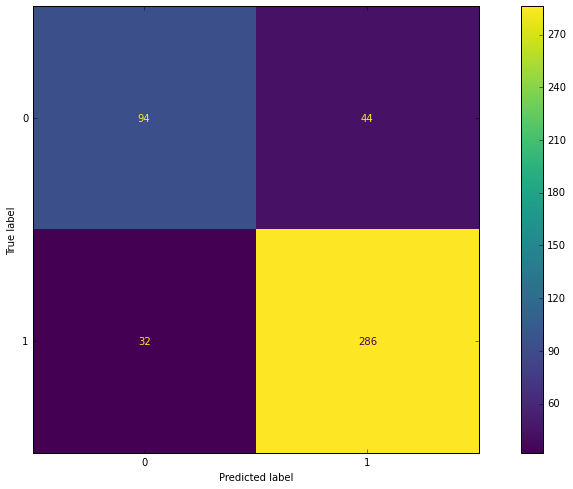

In [168]:
## Confusion matrix of ADB on the testing data

ADB_y_test_predict = ADB_model.predict(ADB_X_test)
ADB_model_score = ADB_model.score(ADB_X_test, ADB_y_test)
print(ADB_model_score)
plot_confusion_matrix(ADB_model,ADB_X_test,ADB_y_test)
print(classification_report(ADB_y_test, ADB_y_test_predict),'\n');

In [169]:
adb_train_metrics = classification_report(ADB_y_train,ADB_y_train_predict,output_dict=True)
adb_train_df = pd.DataFrame(adb_train_metrics).transpose()
adb_train_precision=round(adb_train_df.loc["1"][0],2)
adb_train_recall=round(adb_train_df.loc["1"][1],2)
adb_train_f1=round(adb_train_df.loc["1"][2],2)
print ('adb_train_precision ',adb_train_precision)
print ('adb_train_recall ',adb_train_recall)
print ('adb_train_f1 ',adb_train_f1)

adb_train_precision  0.87
adb_train_recall  0.91
adb_train_f1  0.89


In [170]:
adb_test_metrics = classification_report(ADB_y_test,ADB_y_test_predict,output_dict=True)
adb_test_df = pd.DataFrame(adb_test_metrics).transpose()
adb_test_precision=round(adb_test_df.loc["1"][0],2)
adb_test_recall=round(adb_test_df.loc["1"][1],2)
adb_test_f1=round(adb_test_df.loc["1"][2],2)
print ('adb_test_precision ',adb_test_precision)
print ('adb_test_recall ',adb_test_recall)
print ('adb_test_f1 ',adb_test_f1)

adb_test_precision  0.87
adb_test_recall  0.9
adb_test_f1  0.88


In [171]:
adb_train_acc = ADB_model.score(ADB_X_train, ADB_y_train)
print('Ada Boost Model accuracy for Train data is:\n',adb_train_acc)

adb_test_acc = ADB_model.score(ADB_X_test, ADB_y_test)
print('Ada Boost Model accuracy for Test data is:\n',adb_test_acc)

Ada Boost Model accuracy for Train data is:
 0.8407163053722903
Ada Boost Model accuracy for Test data is:
 0.8333333333333334


AUC: 0.903


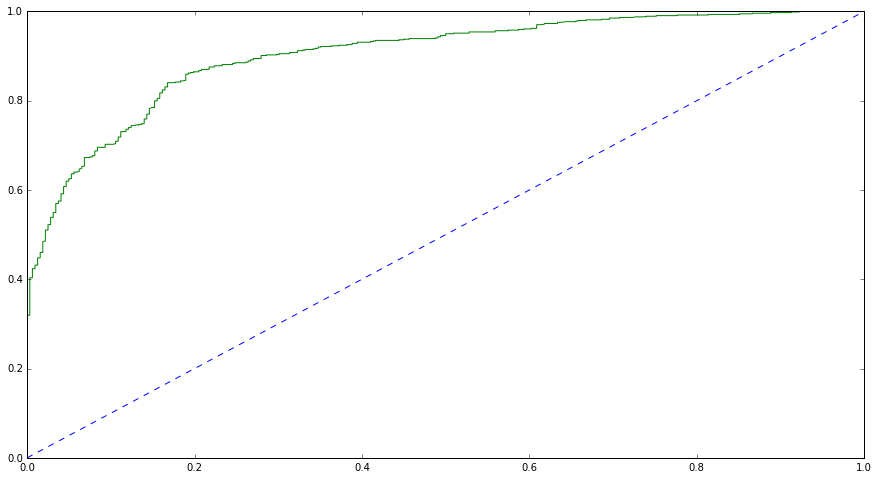

In [172]:
# predict probabilities
probs = ADB_model.predict_proba(ADB_X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_train_auc = roc_auc_score(ADB_y_train, probs)
print('AUC: %.3f' % adb_train_auc)
# calculate roc curve
adb_train_fpr, adb_train_tpr, adb_train_thresholds = roc_curve(ADB_y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_train_fpr, adb_train_tpr)

AUC: 0.905


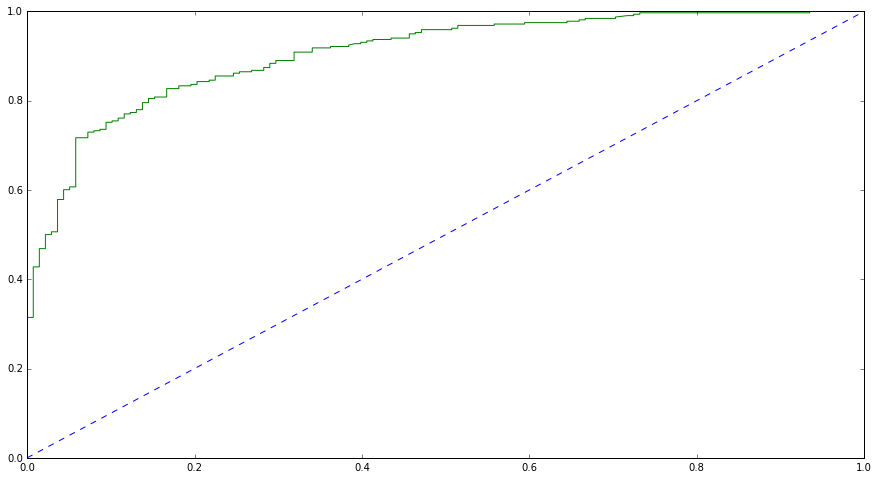

In [173]:
# predict probabilities
probs = ADB_model.predict_proba(ADB_X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_test_auc = roc_auc_score(ADB_y_test, probs)
print('AUC: %.3f' % adb_test_auc)
# calculate roc curve
adb_test_fpr, adb_test_tpr, adb_test_thresholds = roc_curve(ADB_y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_test_fpr, adb_test_tpr)

Gradient Boosting

0.885956644674835
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       322
           1       0.90      0.94      0.92       739

    accuracy                           0.89      1061
   macro avg       0.87      0.85      0.86      1061
weighted avg       0.88      0.89      0.88      1061
 



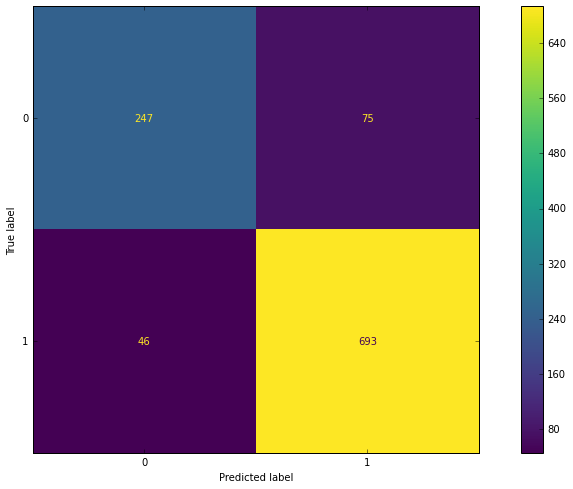

In [174]:
## Confusion matrix of Gradient Boosting on the training data

GBM_y_train_predict = GBM_model.predict(GBM_X_train)
GBM_model_score = GBM_model.score(GBM_X_train, GBM_y_train)
print(GBM_model_score)
plot_confusion_matrix(GBM_model,GBM_X_train, GBM_y_train)
print(classification_report(GBM_y_train, GBM_y_train_predict),'\n');

0.8333333333333334
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       138
           1       0.85      0.92      0.88       318

    accuracy                           0.83       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456
 



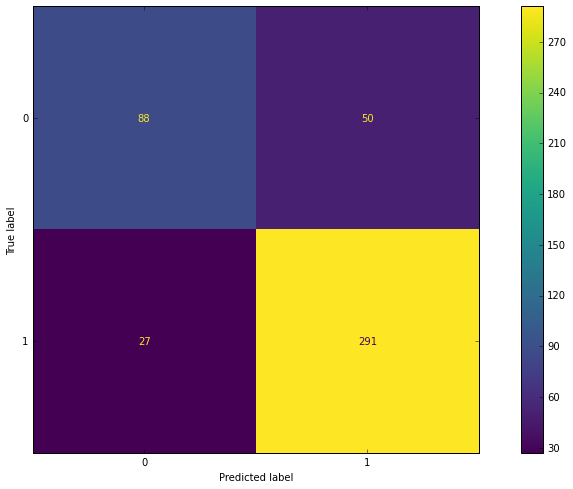

In [175]:
## Confusion matrix of Gradient Boosting on the testing data

GBM_y_test_predict = GBM_model.predict(GBM_X_test)
GBM_model_score = ADB_model.score(ADB_X_test, ADB_y_test)
print(GBM_model_score)
plot_confusion_matrix(GBM_model,GBM_X_test,GBM_y_test)
print(classification_report(GBM_y_test, GBM_y_test_predict),'\n');

In [176]:
gbm_train_metrics = classification_report(GBM_y_train,GBM_y_train_predict,output_dict=True)
gbm_train_df = pd.DataFrame(gbm_train_metrics).transpose()
gbm_train_precision=round(gbm_train_df.loc["1"][0],2)
gbm_train_recall=round(gbm_train_df.loc["1"][1],2)
gbm_train_f1=round(gbm_train_df.loc["1"][2],2)
print ('gbm_train_precision ',gbm_train_precision)
print ('gbm_train_recall ',gbm_train_recall)
print ('gbm_train_f1 ',gbm_train_f1)

gbm_train_precision  0.9
gbm_train_recall  0.94
gbm_train_f1  0.92


In [177]:
gbm_test_metrics = classification_report(GBM_y_test,GBM_y_test_predict,output_dict=True)
gbm_test_df = pd.DataFrame(gbm_test_metrics).transpose()
gbm_test_precision=round(gbm_test_df.loc["1"][0],2)
gbm_test_recall=round(gbm_test_df.loc["1"][1],2)
gbm_test_f1=round(gbm_test_df.loc["1"][2],2)
print ('gbm_test_precision ',gbm_test_precision)
print ('gbm_test_recall ',gbm_test_recall)
print ('gbm_test_f1 ',gbm_test_f1)

gbm_test_precision  0.85
gbm_test_recall  0.92
gbm_test_f1  0.88


In [178]:
gbm_train_acc = GBM_model.score(GBM_X_train, GBM_y_train)
print('Gradient Boost Model accuracy for Train data is:\n',gbm_train_acc)

gbm_test_acc = GBM_model.score(GBM_X_test, GBM_y_test)
print('Gradient Boost Model accuracy for Test data is:\n',gbm_test_acc)

Gradient Boost Model accuracy for Train data is:
 0.885956644674835
Gradient Boost Model accuracy for Test data is:
 0.831140350877193


AUC: 0.948


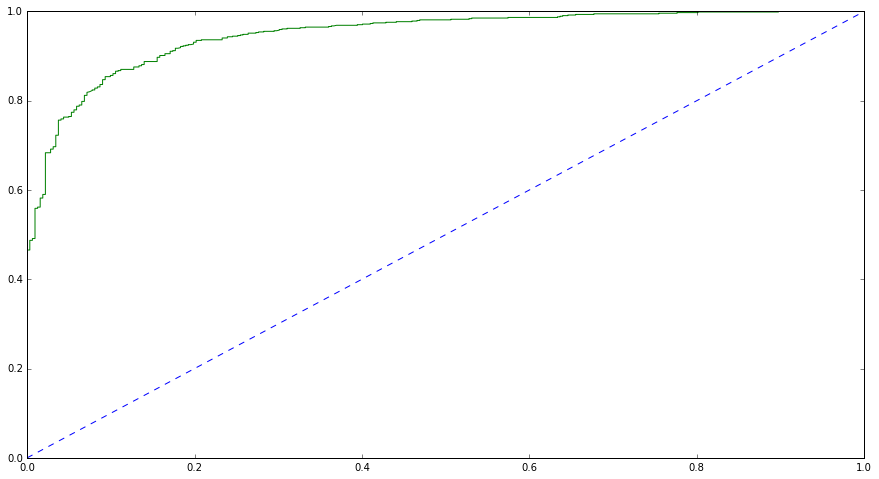

In [179]:
# predict probabilities
probs = GBM_model.predict_proba(GBM_X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbm_train_auc = roc_auc_score(GBM_y_train, probs)
print('AUC: %.3f' % gbm_train_auc)
# calculate roc curve
gbm_train_fpr, gbm_train_tpr, gbm_train_thresholds = roc_curve(GBM_y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbm_train_fpr, gbm_train_tpr)

AUC: 0.899


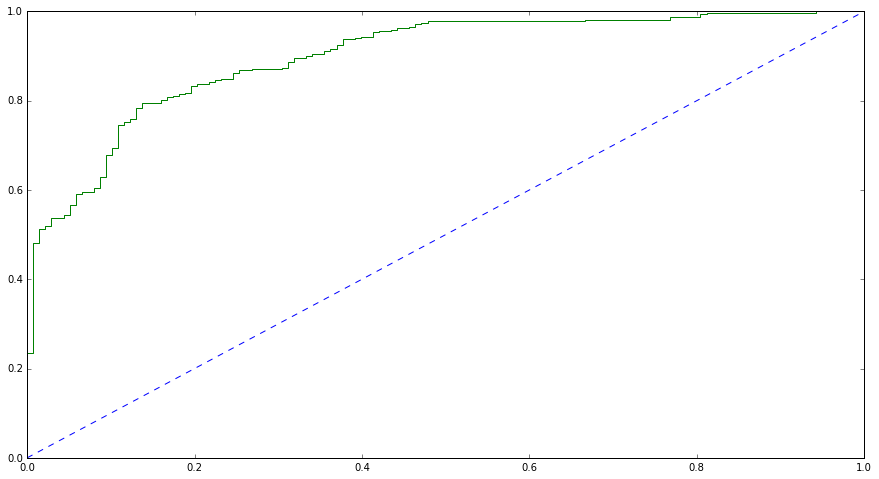

In [180]:
# predict probabilities
probs = GBM_model.predict_proba(GBM_X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbm_test_auc = roc_auc_score(GBM_y_test, probs)
print('AUC: %.3f' % gbm_test_auc)
# calculate roc curve
gbm_test_fpr, gbm_test_tpr, gbm_test_thresholds = roc_curve(GBM_y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbm_test_fpr, gbm_test_tpr)

Bagging Classifier (using Random Forest)

0.8510838831291234
              precision    recall  f1-score   support

           0       0.83      0.65      0.72       322
           1       0.86      0.94      0.90       739

    accuracy                           0.85      1061
   macro avg       0.84      0.79      0.81      1061
weighted avg       0.85      0.85      0.85      1061
 



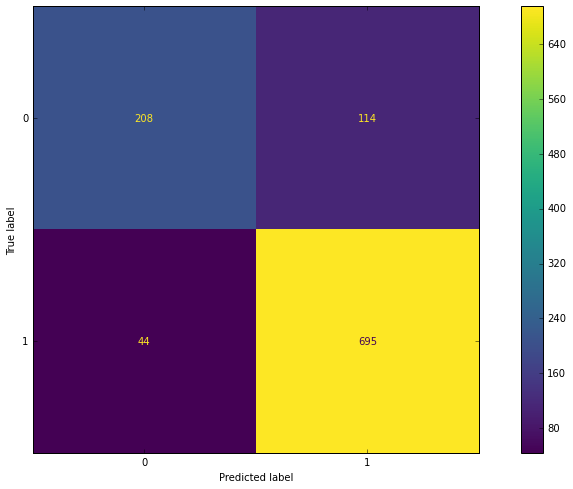

In [181]:
## Confusion matrix of Bagging Classifier on the training data

BAG_y_train_predict = BAG_model.predict(BAG_X_train)
BAG_model_score = BAG_model.score(BAG_X_train, BAG_y_train)
print(BAG_model_score)
plot_confusion_matrix(BAG_model,BAG_X_train, BAG_y_train)
print(classification_report(BAG_y_train, BAG_y_train_predict),'\n');

0.8442982456140351
              precision    recall  f1-score   support

           0       0.84      0.60      0.70       138
           1       0.85      0.95      0.89       318

    accuracy                           0.84       456
   macro avg       0.84      0.78      0.80       456
weighted avg       0.84      0.84      0.84       456
 



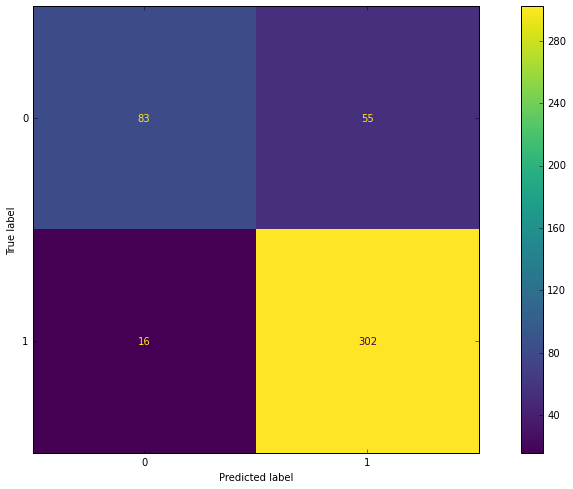

In [182]:
## Confusion matrix of Bagging Classifier on the testing data

BAG_y_test_predict = BAG_model.predict(BAG_X_test)
BAG_model_score = BAG_model.score(BAG_X_test, BAG_y_test)
print(BAG_model_score) 
plot_confusion_matrix(BAG_model, BAG_X_test, BAG_y_test)
print(classification_report(BAG_y_test, BAG_y_test_predict),'\n');

In [183]:
bag_train_metrics = classification_report(BAG_y_train,BAG_y_train_predict,output_dict=True)
bag_train_df = pd.DataFrame(bag_train_metrics).transpose()
bag_train_precision=round(bag_train_df.loc["1"][0],2)
bag_train_recall=round(bag_train_df.loc["1"][1],2)
bag_train_f1=round(bag_train_df.loc["1"][2],2)
print ('bagging_train_precision ',bag_train_precision)
print ('bagging_train_recall ',bag_train_recall)
print ('bagging_train_f1 ',bag_train_f1)

bagging_train_precision  0.86
bagging_train_recall  0.94
bagging_train_f1  0.9


In [184]:
bag_test_metrics = classification_report(BAG_y_test,BAG_y_test_predict,output_dict=True)
bag_test_df = pd.DataFrame(bag_test_metrics).transpose()
bag_test_precision=round(bag_test_df.loc["1"][0],2)
bag_test_recall=round(bag_test_df.loc["1"][1],2)
bag_test_f1=round(bag_test_df.loc["1"][2],2)
print ('bagging_test_precision ', bag_test_precision)
print ('bagging_test_recall ',bag_test_recall)
print ('bagging_test_f1 ',bag_test_f1)

bagging_test_precision  0.85
bagging_test_recall  0.95
bagging_test_f1  0.89


In [185]:
bag_train_acc = BAG_model.score(BAG_X_train, BAG_y_train)
print('Bagging Classifier Model accuracy for Train data is:\n',bag_train_acc)

bag_test_acc = BAG_model.score(BAG_X_test, BAG_y_test)
print('Bagging Classifier Model accuracy for Test data is:\n',bag_test_acc)

Bagging Classifier Model accuracy for Train data is:
 0.8510838831291234
Bagging Classifier Model accuracy for Test data is:
 0.8442982456140351


AUC: 0.922


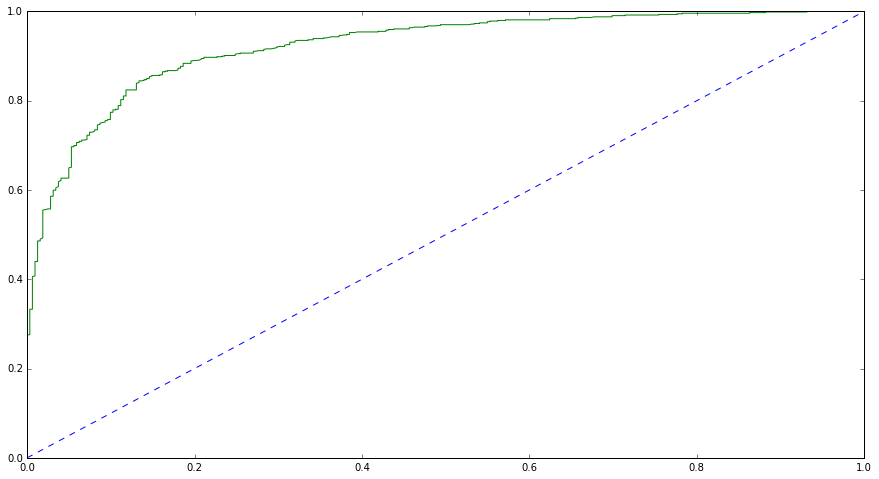

In [186]:
# predict probabilities
probs = BAG_model.predict_proba(BAG_X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_train_auc = roc_auc_score(BAG_y_train, probs)
print('AUC: %.3f' % bag_train_auc)
# calculate roc curve
bag_train_fpr, bag_train_tpr, bag_train_thresholds = roc_curve(BAG_y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_train_fpr, bag_train_tpr)

AUC: 0.912


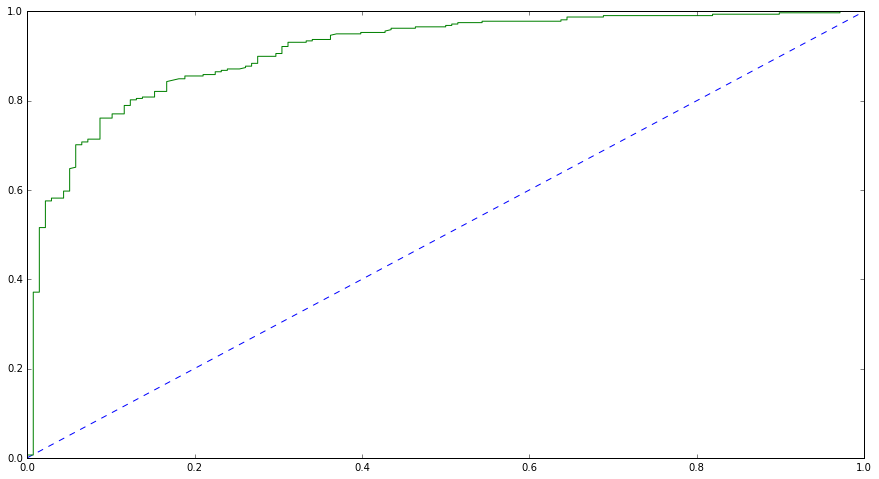

In [187]:
# predict probabilities
probs = BAG_model.predict_proba(BAG_X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_test_auc = roc_auc_score(BAG_y_test, probs)
print('AUC: %.3f' % bag_test_auc)
# calculate roc curve
bag_test_fpr, bag_test_tpr, bag_test_thresholds = roc_curve(BAG_y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_test_fpr, bag_test_tpr)

<b>Interpretation for Logistic Regression & LDA Models:</b>

Though both models are producing same prediction range, Selecting LDA as better model amomng this two as LDA is: 

        1. LDA uses linear combinations of independent variables to predict the class in the response
           variable of a given observation. 
        2. LDA is popular, because it can be used for both classification and dimensionality reduction.
           Main goal of LDA is to project the features in higher-dimensional space onto a lower
           dimensional space. In this case, we have higher dimesions asfter converting the independent
           variables (barring age) into one-hot encoding which increased the dimensions.
        3. LDA creates a linear decision boundary. Note that based on many research study, it is observed
           that LDA performs well when these assumptions are violated.
        4. LDA is based upon the concept of searching for a linear combination of predictor variables
           that best separates the classes of the target variable.
        5. The advantage of using LDA is, the prediction is made simply by the use of Bayes’ theorem
           which estimates the probability of the output class given the input. They also make use of the
           probability of each class and also the data belonging to that class.
        
         
From evaluating the models, LDA Produces higher test data scores on:
  
  AUC - 92%  
  Recall of 0 Class - 72%  
  Precision of both 1 & 0 classes - 88% & 77%   
  f1 scores of both 1 & 0 classes - 89% & 74%  
  
Both the models have fitted well however LDA scores better in most of the test metrics.
  
  
Note that we shall perform other Models to conclude which model is better preferred after evaluating and comapring the performance metrics.

<b>Interpretation for Naive Bayes & KNeighbors Classifier Models:</b>

Naïve baye’s model:

Pros 
- is simple to implement and fast in processing.
- Requires few examples in the train set to work with.
- Perform well with noisy data and missing values.

Cons  
- Perform poorly if the dataset contains more continuous input features.
- Predictions are based on the assumption of independent features which is almost
  impossible in real life scenarios.
- Sometimes the estimated probabilities are less reliable.

KNeigbors Classifier:

Pros  
- K- nearest neighbour algorithm is very simple to implement and the algorithm is robust when the error
  ratio is small. 
- It also does not make any assumption about the distribution of classes and can work with multiple
  classes simultaneously.
  
Cons  
- It calculates distance for every new point so become computationally expensive(Lazy Learner). 
- The method is not effective when distribution overlaps with each other. Fixing an optimal value of K is
  the challenge in KNN method.

For this case, Naive Baye's metrics are better as KNN @ k=3, Accuracy and AUC is well fitted, while KNN is Over-fitted.   
Also looking at the Pros and Cons of both the models, for this dataset NB model is fast in processing also except 'age' which is a continuous variable rest are all categorical type, so working well.

Note that KNN is a 'Lazy Learner' which might impact the model.

<b>Interpretation for Bagging (using Random Forest) & Boosting (Ada & Gradient) Models:</b>

In machine learning the major Challenge is to keep getting better and better predictive model which is the basic building block of machine learning.

The good accuracy of the model is the ultimate goal. The way or technique to increase the accuracy of a model known as ensemble technique.

Advance Ensemble Technique
- Bagging (for this dataset we have used Random Forest Classifier in a Bagging Classifier)
- Boosting (ADaptive Boosting & Gradient Boosting Methods)

Boosting algorithms merge various weak learners to get one strong learner. The
weak learners generally do not perform well on whole data but are efficient of subset of data. That's why when we merge them together, each model increases in efficiency and give better predictions as whole.

For this dataset, Gradient Boosting Method Classifier has performed well on most of the metrics and Bagging also came closer however, Recall of ‘0’ was very less.

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#800080">Model Comparison - Log Reg vs LDA vs Naive Bayes vs KNN vs ADB vs GBM vs Bagging

In [215]:
index=['Accuracy','AUC','Recall','Precision','F1 Score']
data = pd.DataFrame({'Log Regr Train':[logr_train_acc,logr_train_auc,logr_train_recall,logr_train_precision,logr_train_f1],
        'Log Regr Test':[logr_test_acc,logr_test_auc,logr_test_recall,logr_test_precision,logr_test_f1],
       'LDA Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
        'NB Train':[nb_train_acc,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
        'NB Test':[nb_test_acc,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
       'KNN Train':[knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
         'KNN Test':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
        'Ada Boost Train':[adb_train_acc,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1],
        'Ada Boost Test':[adb_test_acc,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1],
       'G-Boost Train':[gbm_train_acc,gbm_train_auc,gbm_train_recall,gbm_train_precision,gbm_train_f1],
         'G-Boost Test':[gbm_test_acc,gbm_test_auc,gbm_test_recall,gbm_test_precision,gbm_test_f1],
        'Bagging (RF) Train':[bag_train_acc,bag_train_auc,bag_train_recall,bag_train_precision,bag_train_f1],
         'Bagging (RF) Test':[bag_test_acc,bag_test_auc,bag_test_recall,bag_test_precision,bag_test_f1],},index=index)
round(data,2) 

,Log Regr Train,Log Regr Test,LDA Train,LDA Test,NB Train,NB Test,KNN Train,KNN Test,Ada Boost Train,Ada Boost Test,G-Boost Train,G-Boost Test,Bagging (RF) Train,Bagging (RF) Test
Accuracy,0.83,0.84,0.84,0.85,0.80,0.82,0.81,0.78,0.84,0.83,0.89,0.83,0.85,0.84
AUC,0.89,0.91,0.89,0.92,0.85,0.85,0.87,0.80,0.90,0.91,0.95,0.90,0.92,0.91
Recall,0.91,0.92,0.89,0.91,0.85,0.87,0.93,0.93,0.91,0.90,0.94,0.92,0.94,0.95
Precision,0.85,0.86,0.88,0.88,0.86,0.87,0.82,0.82,0.87,0.87,0.90,0.85,0.86,0.85
F1 Score,0.88,0.89,0.89,0.89,0.86,0.87,0.87,0.87,0.89,0.88,0.92,0.88,0.90,0.89


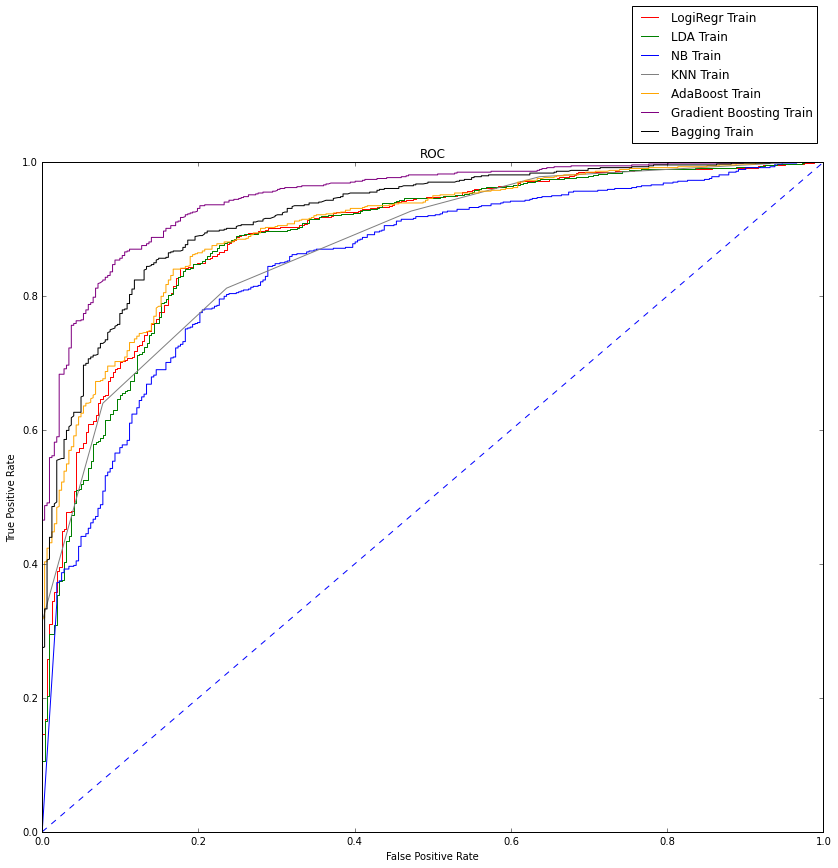

In [216]:
plt.figure(figsize=(14,12))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logr_train_fpr, logr_train_tpr,color='red',label="LogiRegr Train")
plt.plot(LDA_train_fpr,LDA_train_tpr,color='green',label="LDA Train")
plt.plot(nb_train_fpr, nb_train_tpr,color='blue',label="NB Train")
plt.plot(knn_train_fpr,knn_train_tpr,color='grey',label="KNN Train")
plt.plot(adb_train_fpr, adb_train_tpr,color='orange',label="AdaBoost Train")
plt.plot(gbm_train_fpr,gbm_train_tpr,color='purple',label="Gradient Boosting Train")
plt.plot(bag_train_fpr,bag_train_tpr,color='black',label="Bagging Train")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

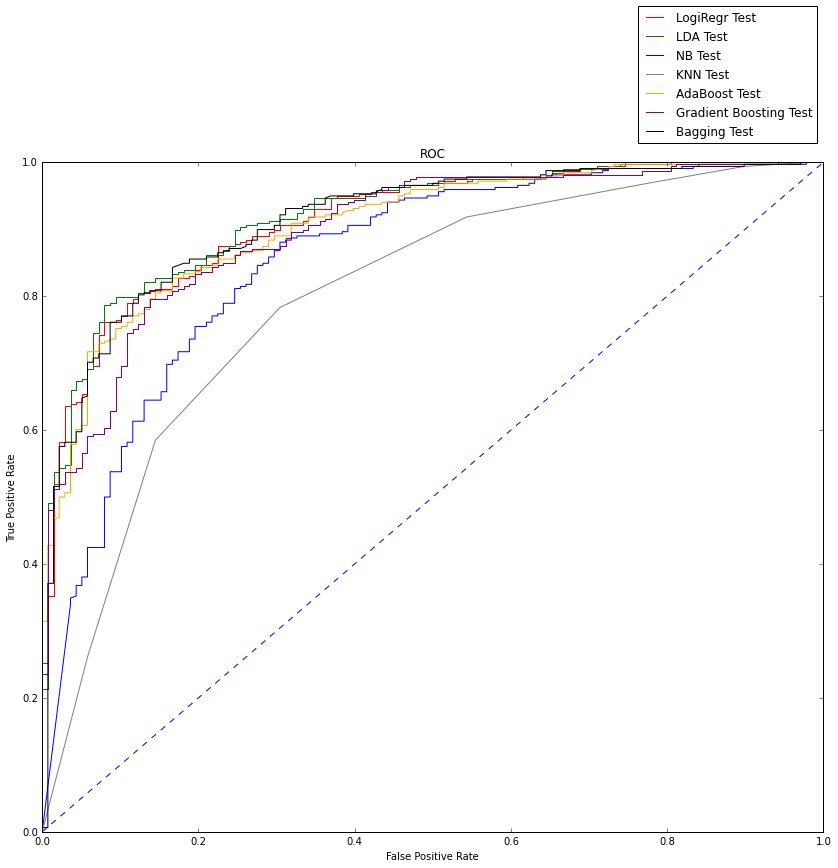

In [217]:
plt.figure(figsize=(14,12))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logr_test_fpr, logr_test_tpr,color='red',label="LogiRegr Test")
plt.plot(LDA_test_fpr,LDA_test_tpr,color='green',label="LDA Test")
plt.plot(nb_test_fpr, nb_test_tpr,color='blue',label="NB Test")
plt.plot(knn_test_fpr,knn_test_tpr,color='grey',label="KNN Test")
plt.plot(adb_test_fpr, adb_test_tpr,color='orange',label="AdaBoost Test")
plt.plot(gbm_test_fpr,gbm_test_tpr,color='purple',label="Gradient Boosting Test")
plt.plot(bag_test_fpr,bag_test_tpr,color='black',label="Bagging Test")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [219]:
LOG_CV_train_scores = cross_val_score(LOG_model, LOG_X_train, LOG_y_train, cv=10)
print('Logistic Regression CV score is:-\n', LOG_CV_scores)

LDA_CV_train_scores = cross_val_score(LDA_model, LDA_X_train, LDA_y_train, cv=10)
print ('LDA CV score is:-\n', LDA_CV_scores)

NB_CV_train_scores = cross_val_score(NB_model, NB_X_train, NB_y_train, cv=10)
print ('NB CV score is:-\n', NB_CV_scores)

KNN_CV_train_scores = cross_val_score(KNN_model, KNN_X_train, KNN_y_train, cv=10)
print ('KNN CV score is:-\n', KNN_CV_scores)

ADB_CV_train_scores = cross_val_score(ADB_model, ADB_X_train, ADB_y_train, cv=10)
print ('ADB CV score is:-\n', ADB_CV_scores)

GBM_CV_train_scores = cross_val_score(GBM_model, GBM_X_train, GBM_y_train, cv=10)
print ('GBM CV score is:-\n', GBM_CV_scores)

BAG_CV_train_scores = cross_val_score(BAG_model, BAG_X_train, BAG_y_train, cv=10)
print ('BAG (using RF) CV score is:-\n', BAG_CV_scores)



Logistic Regression CV score is:-
 [0.8317757  0.83962264 0.8490566  0.82075472 0.85849057 0.77358491
 0.81132075 0.79245283 0.8490566  0.78301887]
LDA CV score is:-
 [0.8411215  0.83962264 0.83962264 0.8490566  0.85849057 0.78301887
 0.79245283 0.78301887 0.85849057 0.79245283]
NB CV score is:-
 [0.82242991 0.80188679 0.75471698 0.79245283 0.83018868 0.77358491
 0.70754717 0.73584906 0.83018868 0.79245283]
KNN CV score is:-
 [0.80373832 0.76415094 0.79245283 0.69811321 0.82075472 0.73584906
 0.68867925 0.72641509 0.76415094 0.67924528]
ADB CV score is:-
 [0.85046729 0.8490566  0.83018868 0.82075472 0.87735849 0.76415094
 0.80188679 0.78301887 0.81132075 0.76415094]
GBM CV score is:-
 [0.8317757  0.8490566  0.83962264 0.78301887 0.89622642 0.81132075
 0.79245283 0.80188679 0.81132075 0.73584906]
BAG (using RF) CV score is:-
 [0.81308411 0.81132075 0.83018868 0.76415094 0.83018868 0.75471698
 0.82075472 0.80188679 0.81132075 0.78301887]


In [220]:
LOG_CV_test_scores = cross_val_score(LOG_model, LOG_X_test, LOG_y_test, cv=10)
print('Logistic Regression Test CV score is:-\n', LOG_CV_scores)

LDA_CV_test_scores = cross_val_score(LDA_model, LDA_X_test, LDA_y_test, cv=10)
print ('LDA Test CV score is:-\n', LDA_CV_scores)

NB_CV_test_scores = cross_val_score(NB_model, NB_X_test, NB_y_test, cv=10)
print ('NB Test CV score is:-\n', NB_CV_scores)

KNN_CV_test_scores = cross_val_score(KNN_model, KNN_X_test, KNN_y_test, cv=10)
print ('KNN Test CV score is:-\n', KNN_CV_scores)

ADB_CV_test_scores = cross_val_score(ADB_model, ADB_X_test, ADB_y_test, cv=10)
print ('ADB Test CV score is:-\n', ADB_CV_scores)

GBM_CV_test_scores = cross_val_score(GBM_model, GBM_X_test, GBM_y_test, cv=10)
print ('GBM Test CV score is:-\n', GBM_CV_scores)

BAG_CV_test_scores = cross_val_score(BAG_model, BAG_X_test, BAG_y_test, cv=10)
print ('BAG (using RF) Test CV score is:-\n', BAG_CV_scores)



Logistic Regression Test CV score is:-
 [0.8317757  0.83962264 0.8490566  0.82075472 0.85849057 0.77358491
 0.81132075 0.79245283 0.8490566  0.78301887]
LDA Test CV score is:-
 [0.8411215  0.83962264 0.83962264 0.8490566  0.85849057 0.78301887
 0.79245283 0.78301887 0.85849057 0.79245283]
NB Test CV score is:-
 [0.82242991 0.80188679 0.75471698 0.79245283 0.83018868 0.77358491
 0.70754717 0.73584906 0.83018868 0.79245283]
KNN Test CV score is:-
 [0.80373832 0.76415094 0.79245283 0.69811321 0.82075472 0.73584906
 0.68867925 0.72641509 0.76415094 0.67924528]
ADB Test CV score is:-
 [0.85046729 0.8490566  0.83018868 0.82075472 0.87735849 0.76415094
 0.80188679 0.78301887 0.81132075 0.76415094]
GBM Test CV score is:-
 [0.8317757  0.8490566  0.83962264 0.78301887 0.89622642 0.81132075
 0.79245283 0.80188679 0.81132075 0.73584906]
BAG (using RF) Test CV score is:-
 [0.81308411 0.81132075 0.83018868 0.76415094 0.83018868 0.75471698
 0.82075472 0.80188679 0.81132075 0.78301887]


From the above Models, 2 models stand out on the metrics performance:

    Gradient Boosting Method on Train data  
    Linear Discriminant Analysis on Test data

However the prediction is based on a data set that was ~70:30 ratio on predict classes of 0(Conservative) & 1(Labour Party).

Let's try using SMOTE hyper tuning method to oversample 1 class(Labour Party) and make the dataset close to 50:50 ratio and then perform LDA vs. GBM on the same to see if there is an improvement in the metrics.

In [221]:
sm_data = elect_data.copy() # Copy all the predictor variables into X dataframe
X = elect_data.drop('vote', axis=1)

# Copy target into the y dataframe. 
y = elect_data['vote']

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [223]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [224]:
LDA_SM_model = LinearDiscriminantAnalysis()
LDA_SM_model.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [225]:
## Performance Matrix on train data set with SMOTE
y_train_predict = LDA_SM_model.predict(X_train_res)
model_score = LDA_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8912466843501327
[[660  94]
 [ 70 684]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       754
           1       0.88      0.91      0.89       754

    accuracy                           0.89      1508
   macro avg       0.89      0.89      0.89      1508
weighted avg       0.89      0.89      0.89      1508



In [226]:
## Performance Matrix on test data set
y_test_predict = LDA_SM_model.predict(X_test)
model_score = LDA_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8201754385964912
[[105  48]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



In [227]:
GBM_SM_model = GradientBoostingClassifier()
GBM_SM_model.fit(X_train_res, y_train_res)

GradientBoostingClassifier()

In [228]:
## Performance Matrix on train data set with SMOTE
y_train_predict = GBM_SM_model.predict(X_train_res)
model_score = GBM_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.9210875331564987
[[700  54]
 [ 65 689]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       754
           1       0.93      0.91      0.92       754

    accuracy                           0.92      1508
   macro avg       0.92      0.92      0.92      1508
weighted avg       0.92      0.92      0.92      1508



In [200]:
## Performance Matrix on test data set
y_test_predict = GBM_SM_model.predict(X_test)
model_score = GBM_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8157894736842105
[[115  38]
 [ 46 257]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       153
           1       0.87      0.85      0.86       303

    accuracy                           0.82       456
   macro avg       0.79      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [201]:

LDA_CV_scores = cross_val_score(LDA_SM_model, X_train_res, y_train_res, cv=10)
LDA_CV_scores

array([0.70860927, 0.82781457, 0.79470199, 0.7615894 , 0.96688742,
       0.94039735, 0.94039735, 0.96688742, 0.89333333, 0.97333333])

In [202]:
GBM_CV_scores = cross_val_score(GBM_SM_model, X_train_res, y_train_res, cv=10)
GBM_CV_scores

array([0.73509934, 0.86092715, 0.81456954, 0.82119205, 0.94701987,
       0.90728477, 0.91390728, 0.94701987, 0.86666667, 0.96      ])

SMOTE is usually done only when the minority class is <=5%. However to check if there is an improvement in metrics, we performed SMOTE for LDA & GBM models. The result is that SMOTE should not be used as the models are not a valid after performing CV=10 folds. Bothe are over fiting with values ranging from 70% to 97% for LDA and 71 - 95% for GBM. So we stick to the metrics perforformed without SMOTE. 

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF4500">1.8. Final Inference and interpretation: Basis on these predictions, what are the insights and recommendations.

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#000080">Insights from the data-set:
    
1.  The data is well dispersed with ~70:30 ratio on the predictor class. Therefore the model building
    can be done better as there balance in data.
   
        Proportion of Vote for Labour       Party 0's ('no')is:-  70 %
        Proportion of Vote for Conservative Party 1's ('yes')is:- 30 %

2.  The average age of voters in the dataset is 54 with youngest voter aged at 24 & oldest aged 93. Also
    50% of voters are in age group of 24-53.

3.  The gender representation is 53%:47% of Female to Male ratio. Number of Female voters are highly
    represented in 812 records to that of 713 records of Male in the given dataset.

4.  The 'Eurosceptic' sentiment is high in influencing the vote. Out of 1525 records, 957 voters having
    high 'Eurosceptic' sentiment of rating >=6 which is almost 2/3rd of the voters.
    The 'Eurosceptic' sentiment is a highly influencing variable to the predict class 'vote'.

5.  There are 455 voters who have voted with zero political knowledge. Higher number of voters having a
    scale of 2. This only shows the awareness level on political scenario but cannot be concluded as a
    highly influencing attribute.

6.  In both variables of economic conditions on nation and household, the voters on extreme scales of 
    1 & 5 are not influencing the decision on votes. Looks like the middle class has a higher influence
    on voting.

7.  The correlation between variables is inferred through the heat-map:
    
          1. The independent variables are not correlated to each other hence there may not be
             multicollinearity.    
    
          2. economic.cond.household - economic.cond.national is most positively correlated with 0.35.  
    
          3. There is hardly any correlation between the independant variables.

8.  The diagonals of the pair-plot is a good visualiser for understanding how the classes are
    distributed and separated. If the classes are well separated (blue & orange distribution) then
    models like LDA can be a good predictor/classifier and if the classes are not separated, then
    Logistic regression can play a good role.

9.  Also presence or normally distributed variables can be a good contributor in predicting/classifying
    the dependant variable. In this case 'Europe' is fairly a good variables to predict and classify.
    Logically also this hold good.

10. Age groups of 36,46,47 & 50 are the highest voting segment for Labour Party. 
    Age groups of 70,66 & 35 are the highest voting segment for Conservative Party.

11. Voters rated average to good on 'economic.cond.national', have voted for Labour Party more. 
    Extreme segments of 1 & 2 have been less in terms of count however voters who have rated lowest have
    voted for Conservative Party.

12. Irrespective of the rating, voters on 'economic.cond.household', have voted for Labour Party more.


13. Conservative Party is favoured among highly 'Eurosceptic' sentiment voters. 
    Among voters with less 'Eurosceptic'sentiment, Labour Party is in proportion very highly preferred.

14. There are 455 total voters who have voted with zero political knowledge. Higher number of voters
    having a scale of 2. This only shows the awarness level on political scenario but cannot be
    concluded as a highly influencing attribute.
    Labour party is highly preferred party irrespective of the political knowledge among voters.

15. From the above Model building, 2 models stand out on the metrics performance:

        Gradient Boosting Method on Train data  
        Linear Discriminant Analysis on Test data

    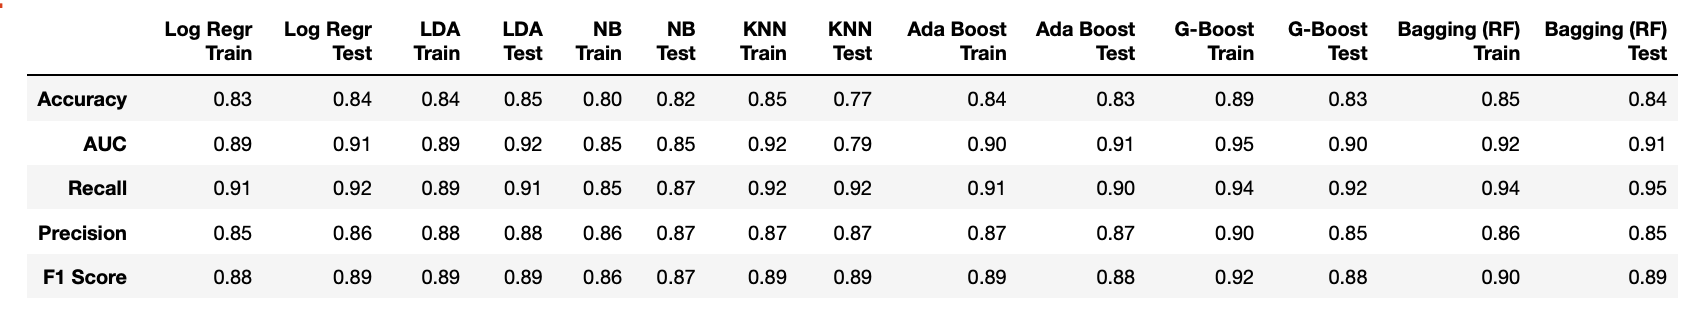
    
#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#DC143C">Inferences from Model building:-  
    
Though both models are producing same prediction range, Selecting LDA as better model amomng this two as LDA is:  
    
    1. LDA uses linear combinations of independent variables to predict the class in the response
       variable of a given observation.   
    2. LDA is popular, because it can be used for both classification and dimensionality reduction.
       Main goal of LDA is to project the features in higher-dimensional space onto a lower
       dimensional space. In this case, we have higher dimesions after converting the independent
       variables (barring age) into one-hot encoding which increased the dimensions.  
    3. LDA creates a linear decision boundary. Note that based on many research study, it is observed
       that LDA performs well when these assumptions are violated.  
    4. LDA is based upon the concept of searching for a linear combination of predictor variables
       that best separates the classes of the target variable.  
    5. The advantage of using LDA is, the prediction is made simply by the use of Bayes’ theorem
       which estimates the probability of the output class given the input. They also make use of the
       probability of each class and also the data belonging to that class.  

From evaluating the models, LDA Produces higher test data scores on:  
       
        AUC - 92%  
        Recall of 0 Class - 72%  
        Precision of both 1 & 0 classes - 88% & 77%  
        f1 scores of both 1 & 0 classes - 89% & 74%  
        ROC curve also closer to Y axis and then from ~0.1 FPR.
    
    Both the models have fitted well however LDA scores better in most of the test metrics.  
    (Note:- LDA performs better when the datset is small).  

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#006400">Recommendations to the management: 
    
     1. The prediction clearly favours WIN for Labour Party.  
     2. Tony Blair is predicted to WIN.  
     3. 'Eurosceptic' sentiment plays a major role in influencing the vote. Lower the sentiment, Labour
        Party is preferred and Conservative Party among higher sentiment voters.  
     4. LDA as a model performed well and the same is also evident on the test metrics as well as the
        CrossVal Score. LDA scores highest in the CorssVal score of 84% @CV = 10. 
     5. More Samples added to the system, more data can be trained which will help in better performance of
        the models.
     6. Note that Gradient Boosting Method also has very closely performed well to that of LDA especially in
        the train set. For future model evaluation on this dataset with increased samples, both these two
        models of LDA and Gradient Boosting Method can be evaluated. (Bagging though came closer,Recall of
        ‘0’ was very less)


#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#006400">-------------------------------------------------------------------- End of report -------------------------------------------------------------------------